# Parameter Evaluation
### <a href='#Parameter_n_epochs'>Parameter: n_epochs</a>
### <a href='#Parameter_number_conv_deconv_layers'>Parameter: number of conv-layers and deconv-layers</a>
### <a href='#Parameter_lr'>Parameter: lr</a>
### <a href='#Parameter_batch_size'>Parameter: batch_size</a>
### <a href='#Parameter_beta1'>Parameter: beta1</a>
### <a href='#Parameter_dropout'>Parameter: Dropout config</a>

In [10]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

### Best-Off Results  
- Train Run 26
- lr = 0.0002
- batch_size = 32
- beta1 = 0.2

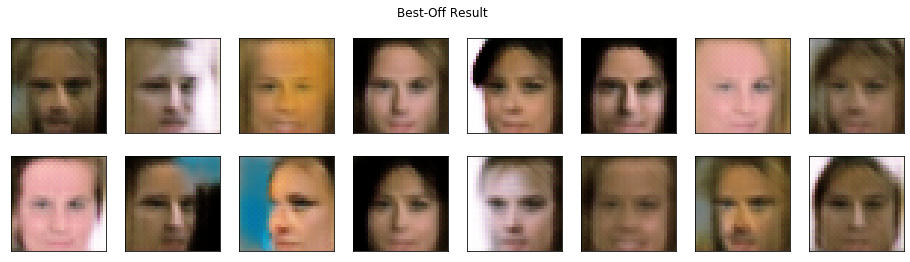

In [48]:
# lr=0.001, 0.0005, 0.0002
parameter_list = ['Best-Off Result']
train_num_list = [26]
param = 'lr'
for param_value, train_num in zip(parameter_list,train_num_list):
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value)

In [84]:
# helper function for viewing a list of passed in sample images
def view_samples_2(epoch, samples, train_num, param_value):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))
    fig.suptitle(param_value)
    fig.savefig('image_sets/train_' + str(train_num) + '_' + str(param_value) + '.png')

In [81]:
# helper function for viewing a list of passed in sample images
def view_plots(train_runs, title, param):
    number_of_pots = len(train_runs)
    train_run_list = [m[0] for m in train_runs]
    param_list = [m[1] for m in train_runs]
    epochs_calc = [m[2] for m in train_runs]
    
    ax_set = ('a' + str(m) for m in range(number_of_pots))
    
    fig, ax_set = plt.subplots(figsize=(16,4), nrows=1, ncols=number_of_pots)
    fig.suptitle(title)
    for ii,train_num in enumerate(train_run_list):
        df = pd.read_excel('training_results/train_' + str(train_num) + '_' + str(param_list[ii]) + '.xlsx')  # doctest: +SKIP
        loss_d = df['Discriminator'].values
        loss_g = df['Generator'].values
        ax_set[ii].plot(df.index/epochs_calc[ii], loss_d, label='Discriminator')
        ax_set[ii].plot(df.index/epochs_calc[ii], loss_g, label='Generator')
        ax_set[ii].set_title('Train_' + str(train_num))
        #ax_set[ii].xlabel('n_epochs', fontsize=14)
        #ax_set[iniidex].ylabel('loss', fontsize=14)
        ax_set[ii].legend()
        
    fig.savefig('plots/train_' + str(param) + '.png')

In the following section the parameter tuning investigated in separated training runs is depicted. Furthermore the resulting **Loss** for each training run (parameter variation) is shown as a measure of training success.

<a id='Parameter_n_epochs'></a>

## Parameter: n_epochs
## To do: Über das finale Trainingset von 1...500

Parameters          | 1st Train-Run | 2nd Train-Run | 3rd Train-Run | 4th Train-Run | 5th Train-Run | 6th Train-Run |
----------          | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
batch_size          |   128         |   128         |   128         |   128         |   128         |   128         |
img_size            |   32          |   32          |   32          |   32          |   32          |   32          |
deconv-layers       |   3           |   3           |   3           |   3           |   3           |   3           |
conv-layers         |   3           |   3           |   3           |   3           |   3           |   3           |
d_conv_dim          |   32          |   32          |   32          |   32          |   32          |   32          |
g_conv_dim          |   32          |   32          |   32          |   32          |   32          |   32          |
z_size              |   100         |   100         |   100         |   100         |   100         |   100         |
lr                  |   0.001       |   0.001       |   0.001       |   0.001       |   0.001       |   0.001       |  
beta1               |   0.5         |   0.5         |   0.5         |   0.5         |   0.5         |   0.5         |
beta2               |   0.999       |   0.999       |   0.999       |   0.999       |   0.999       |   0.999       |
dropout             |   no          |   no          |   no          |   no          |   no          |   no          |
**n_epochs**        |   `1`         |   `10`        |   `50`        |   `100`       |   `500`       |   `1000`      |

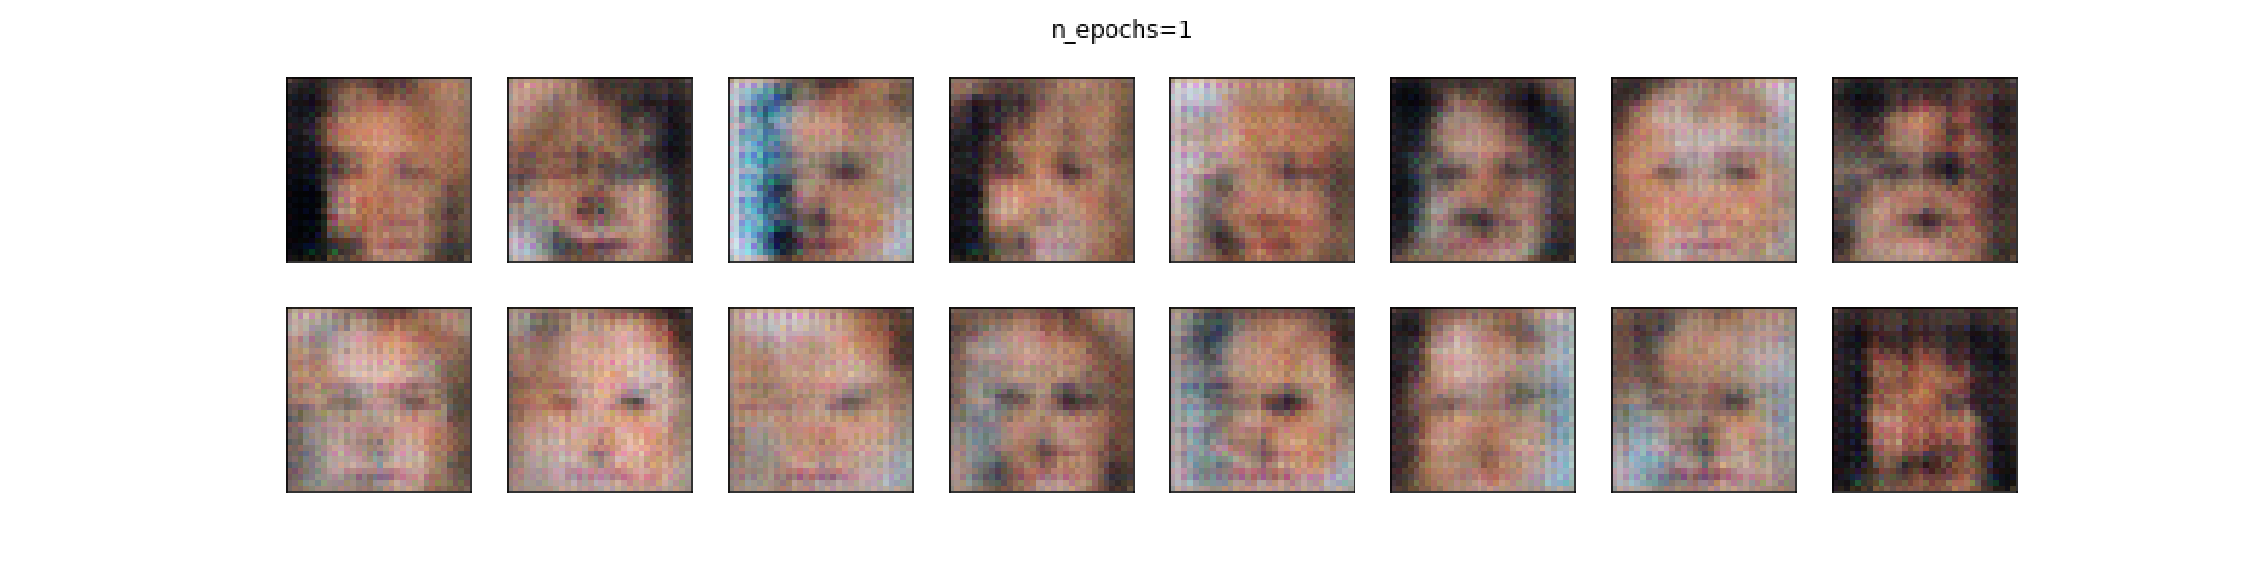

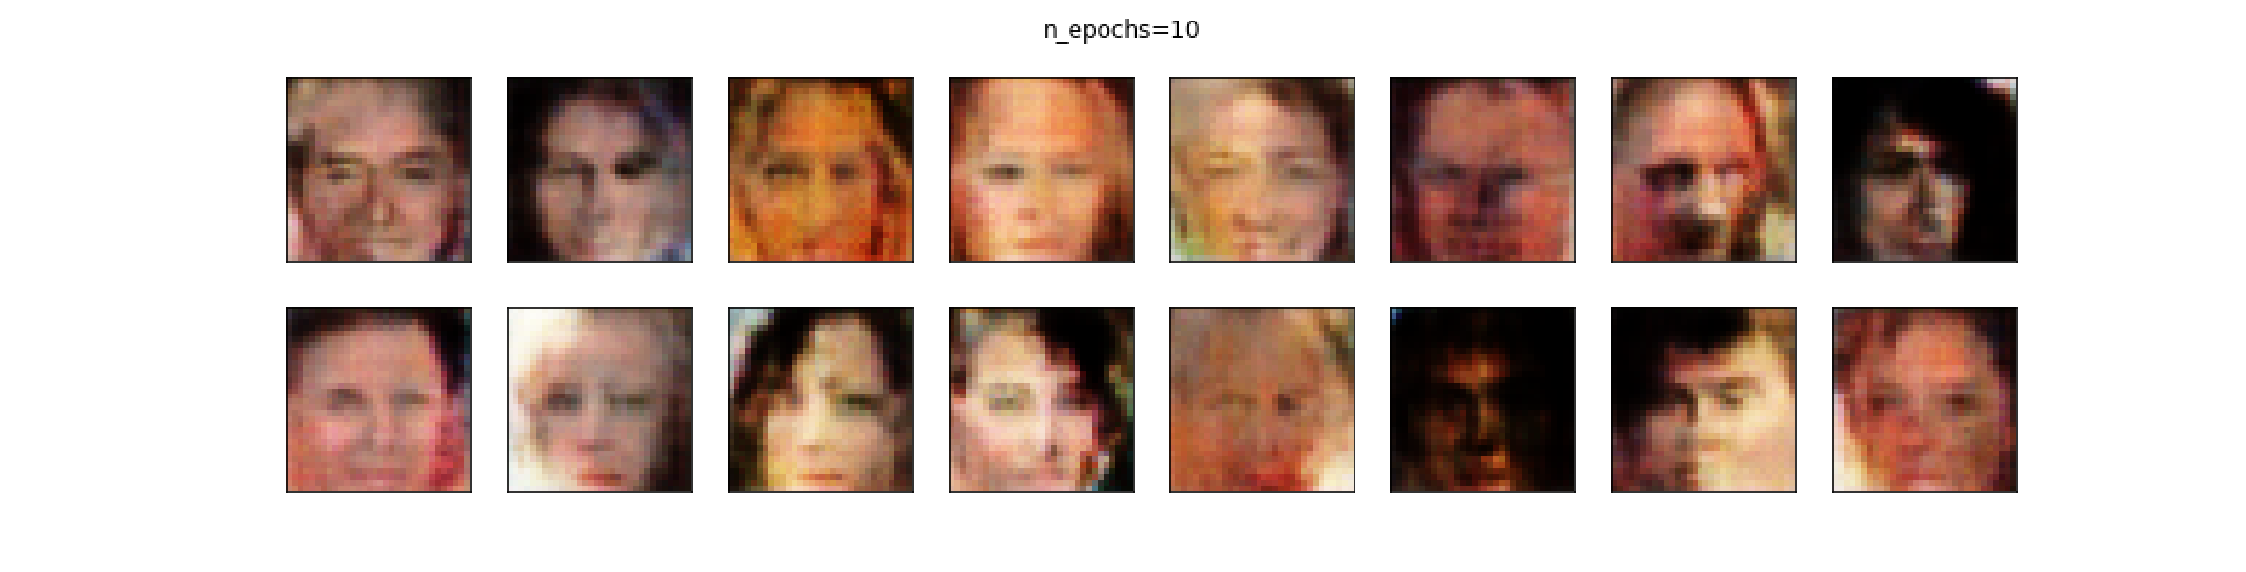

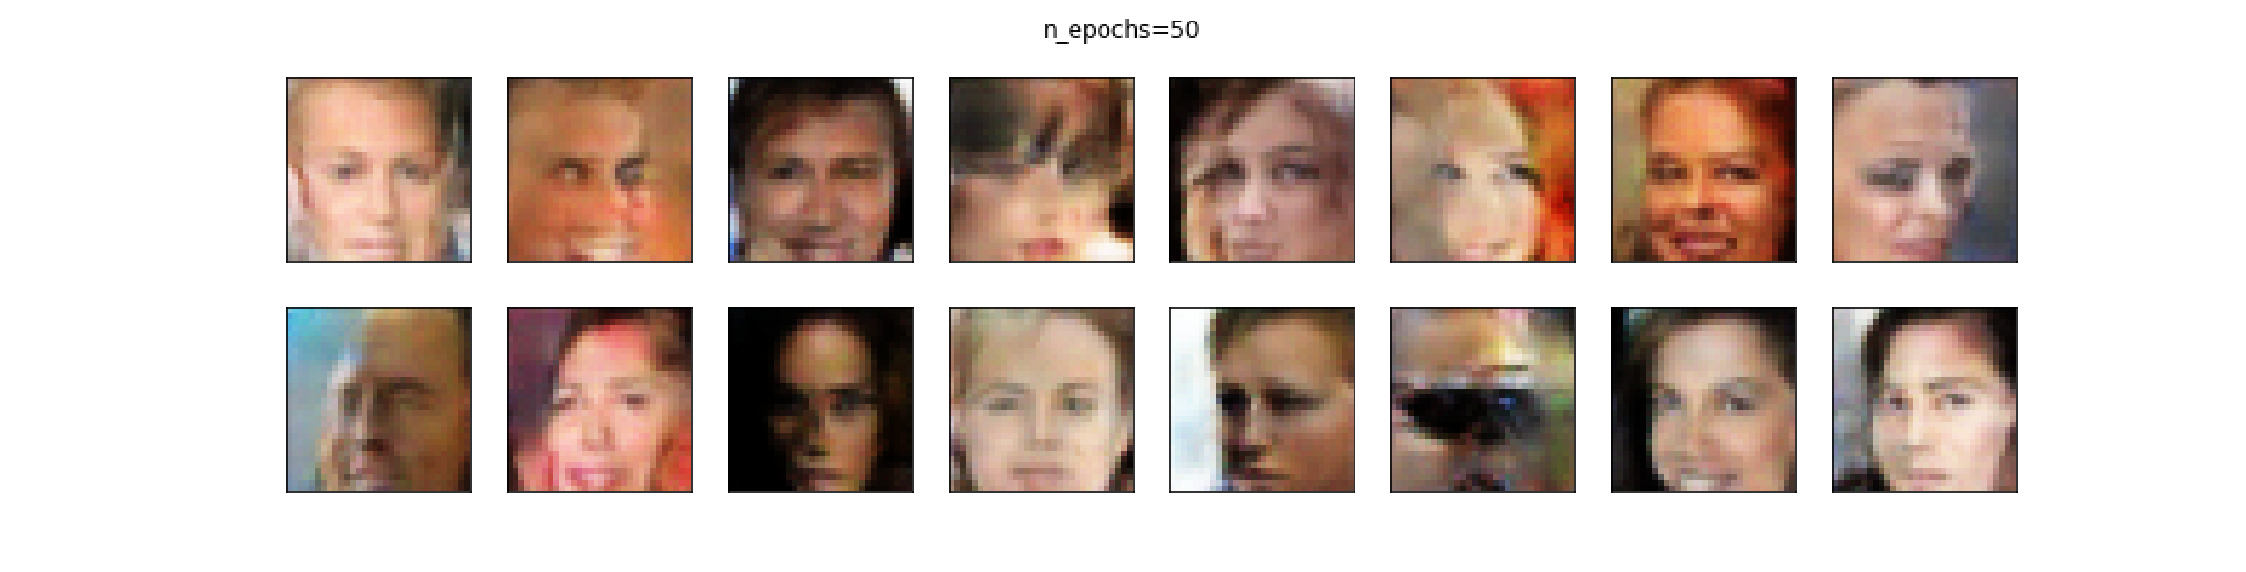

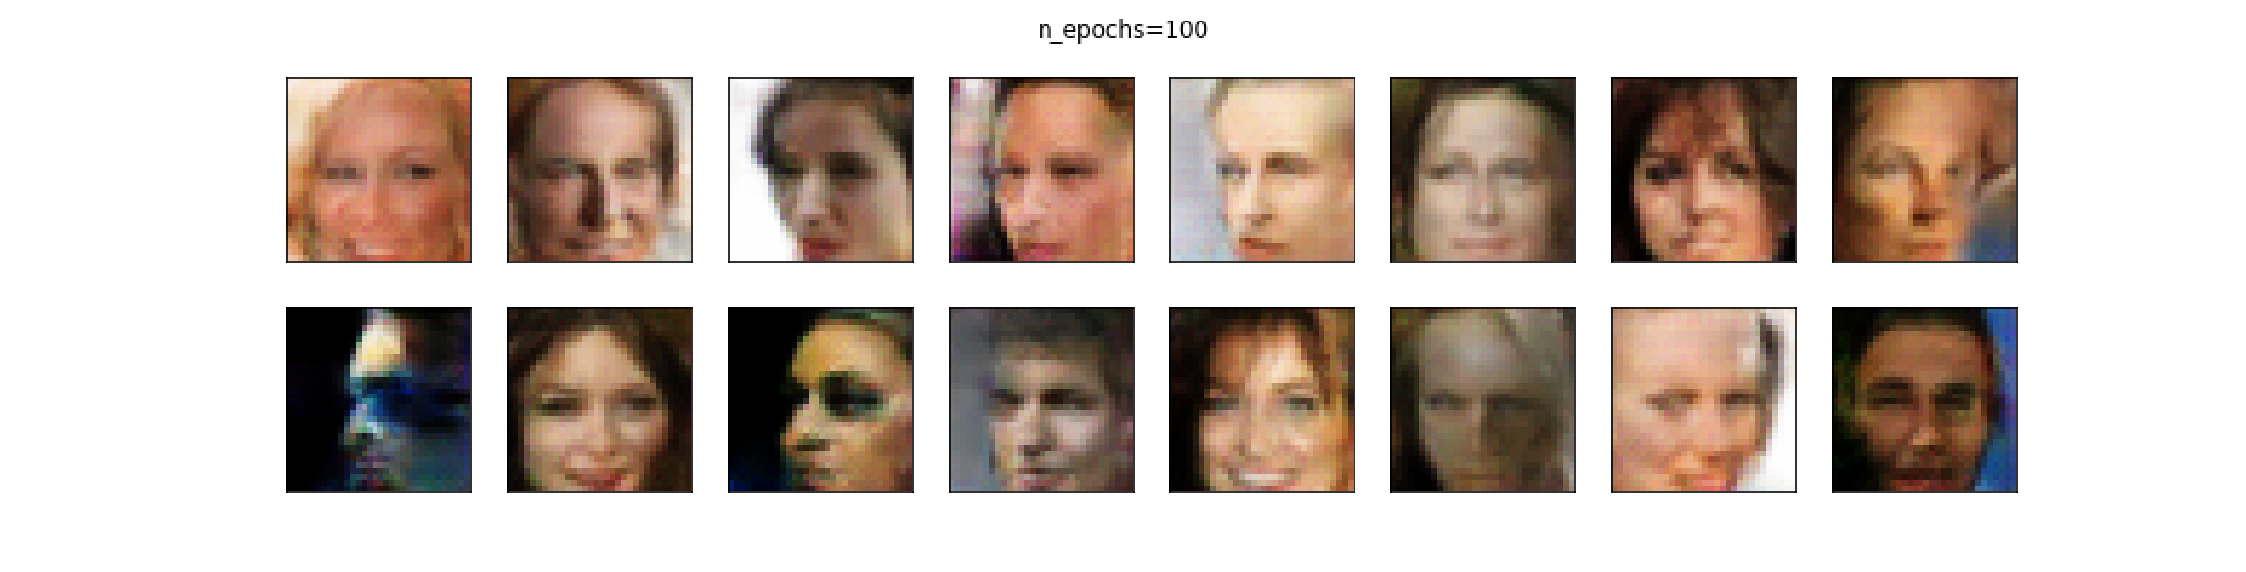

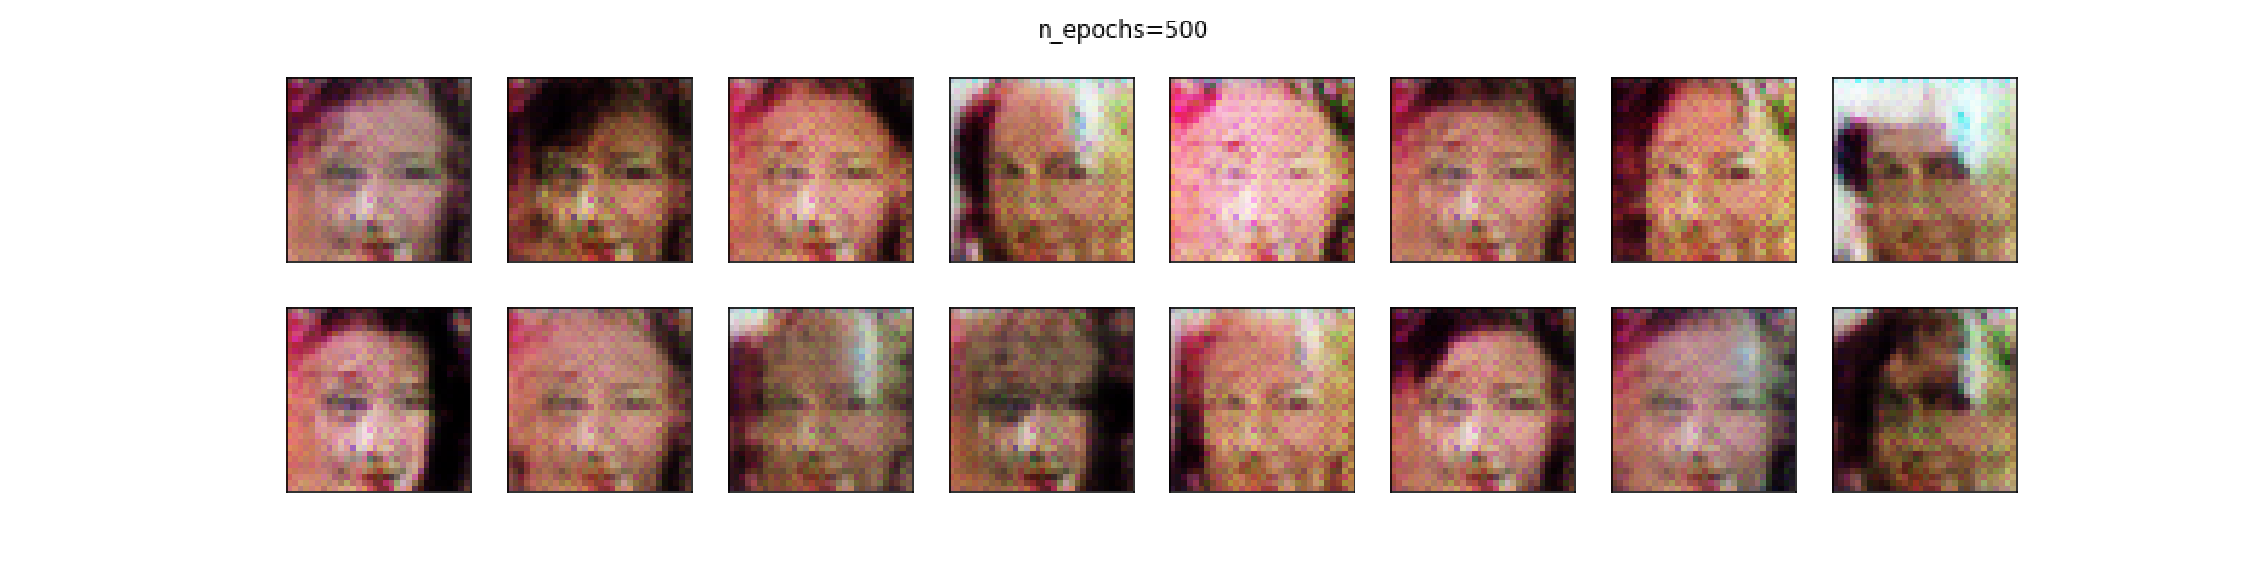

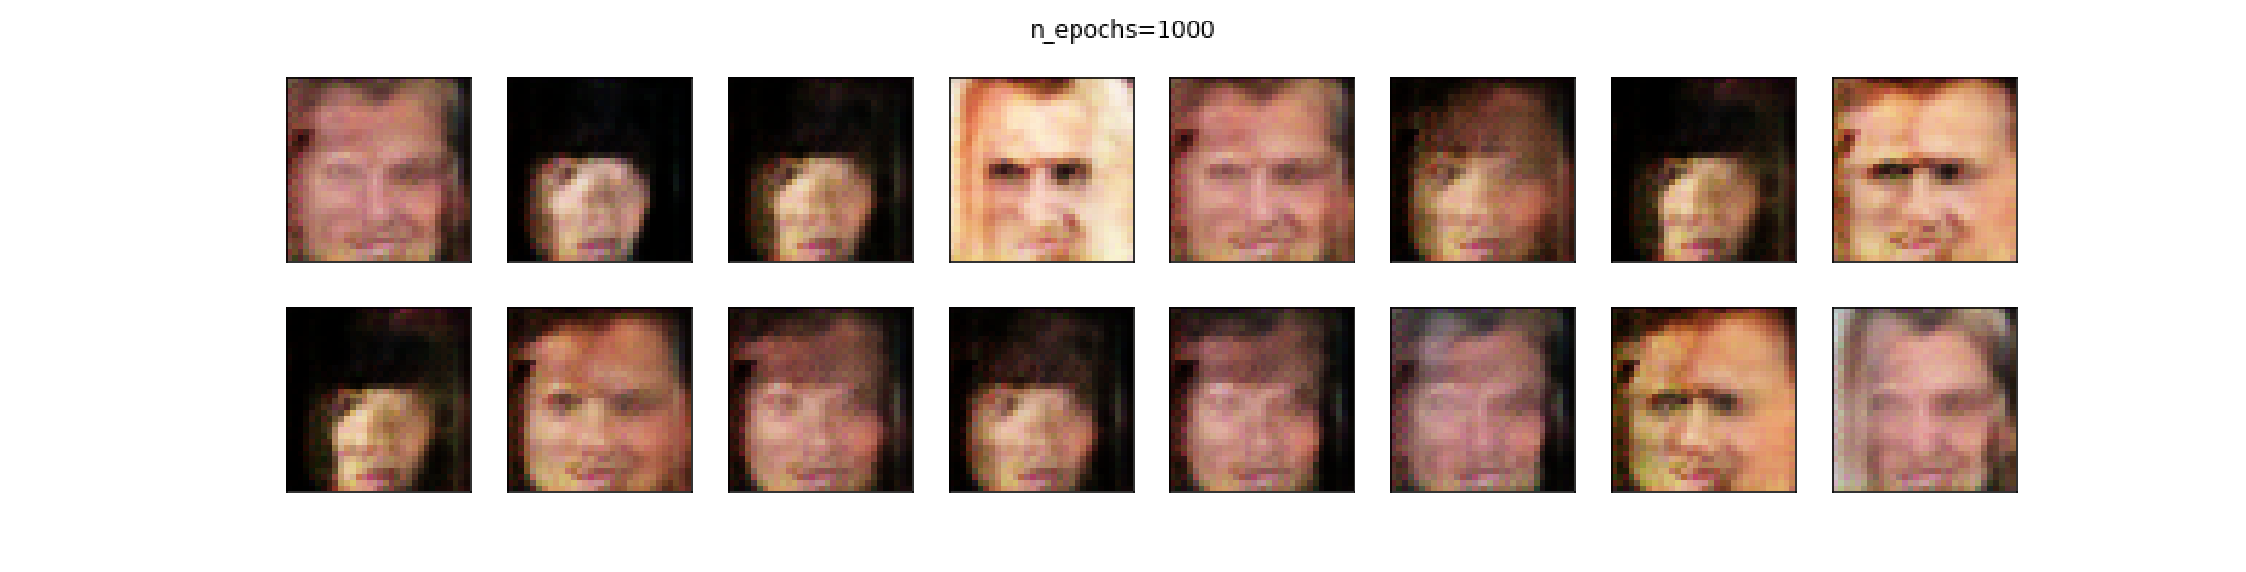

In [50]:
# n_epochs = 1, 10, 50, 100, 500, 1000
parameter_list_name = ['n_epochs=1','n_epochs=10', 'n_epochs=50', 'n_epochs=100', 'n_epochs=500', 'n_epochs=1000']
train_num_list = [1, 2, 3, 4, 5, 6]
param_list = ['num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs']
for param, param_value_name, train_num in zip(param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)
    
    
# n_epochs = 1, 10, 50, 100, 200, 300, 400, 500
parameter_list_name = [6* 'Train32 best off']
train_num_list = [6* best_off]
param_list = ['num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs', 'num_epochs']
epoch_list = [1, 10, 50, 100 , 200, 300, 400, 500]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

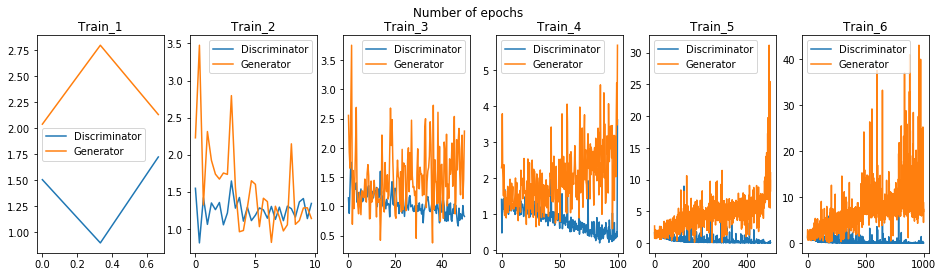

In [51]:
Anpassen
view_plots([[1, 'num_epochs', 3],
            [2, 'num_epochs', 3],
            [3, 'num_epochs', 3],
            [4, 'num_epochs', 3],
            [5, 'num_epochs', 3],
            [6, 'num_epochs', 3]], 'Number of epochs', 'n_epochs') 

### Result for parameter n_epochs:
Best value setting for the number of epochs extends to the range 50...100. Lower epoch values lead to underfitting, higher epoch values tend to pronounced noisy behavior of the discriminator loss. In both regimes the generated face images are blurred. In the following 100 epochs will be used for further parameter studies.

<a id='Parameter_number_conv_deconv_layers'></a>

## Parameter: number of conv-layers and deconv-layers
<img src='assets/number_conv_deconv_layers.png' width=60% />

Parameters          | 4th Train-Run | 8th Train-Run | 
----------          | ------------- | ------------- |
batch_size          |   128         |   128         |  
img_size            |   32          |   32          | 
**deconv-layers**   |   `3`         |   `4`         |
**conv-layers**     |   `3`         |   `4`         | 
d_conv_dim          |   32          |   32          |
g_conv_dim          |   32          |   32          | 
z_size              |   100         |   100         |  
lr                  |   0.001       |   0.001       |  
beta1               |   0.5         |   0.5         | 
beta2               |   0.999       |   0.999       |
dropout             |   no          |   no          |
n_epochs            |   100         |   100         |

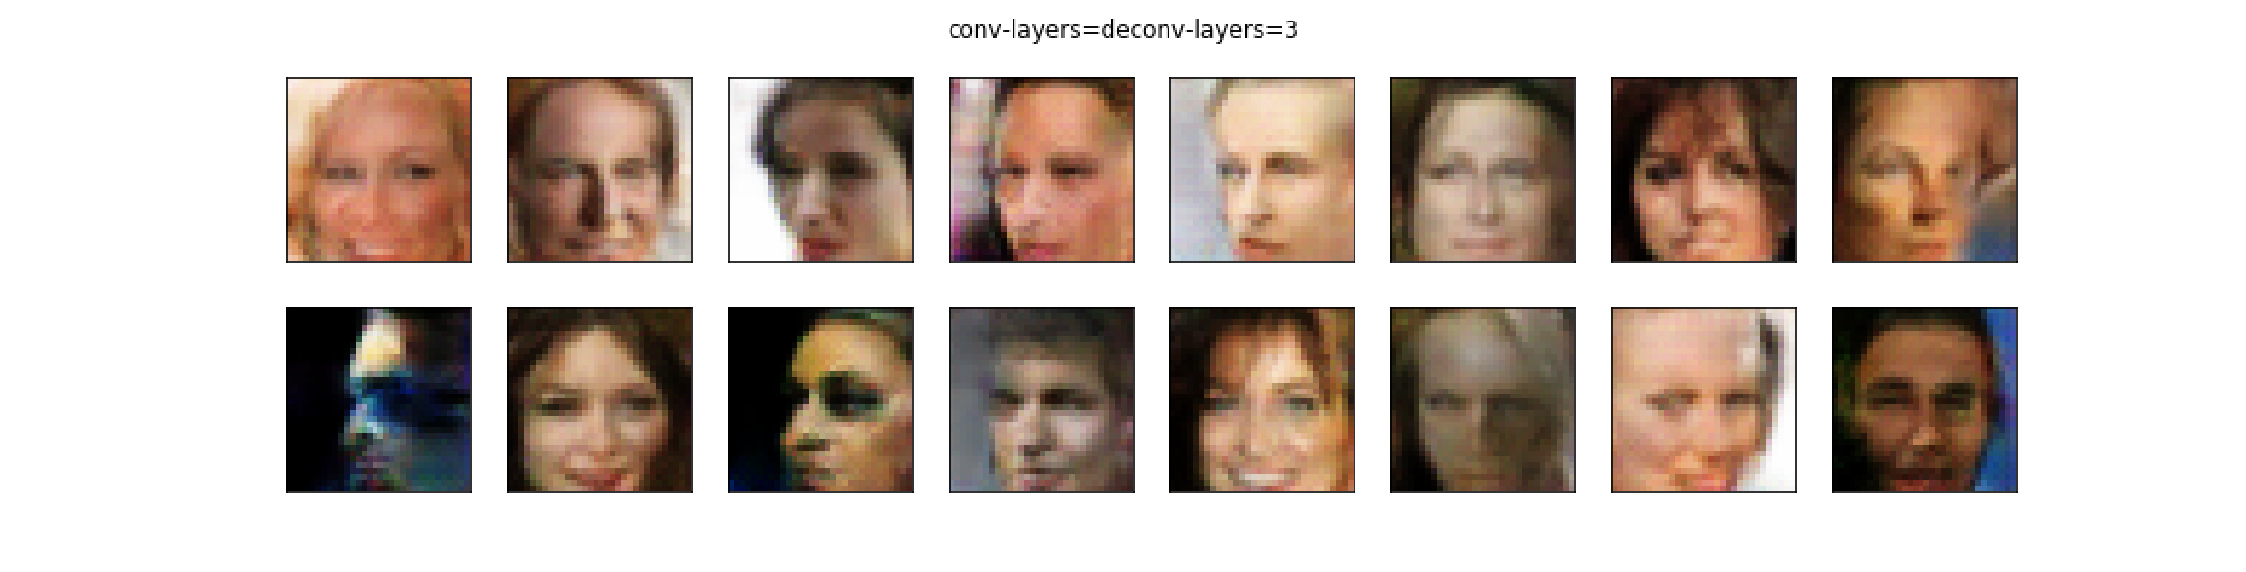

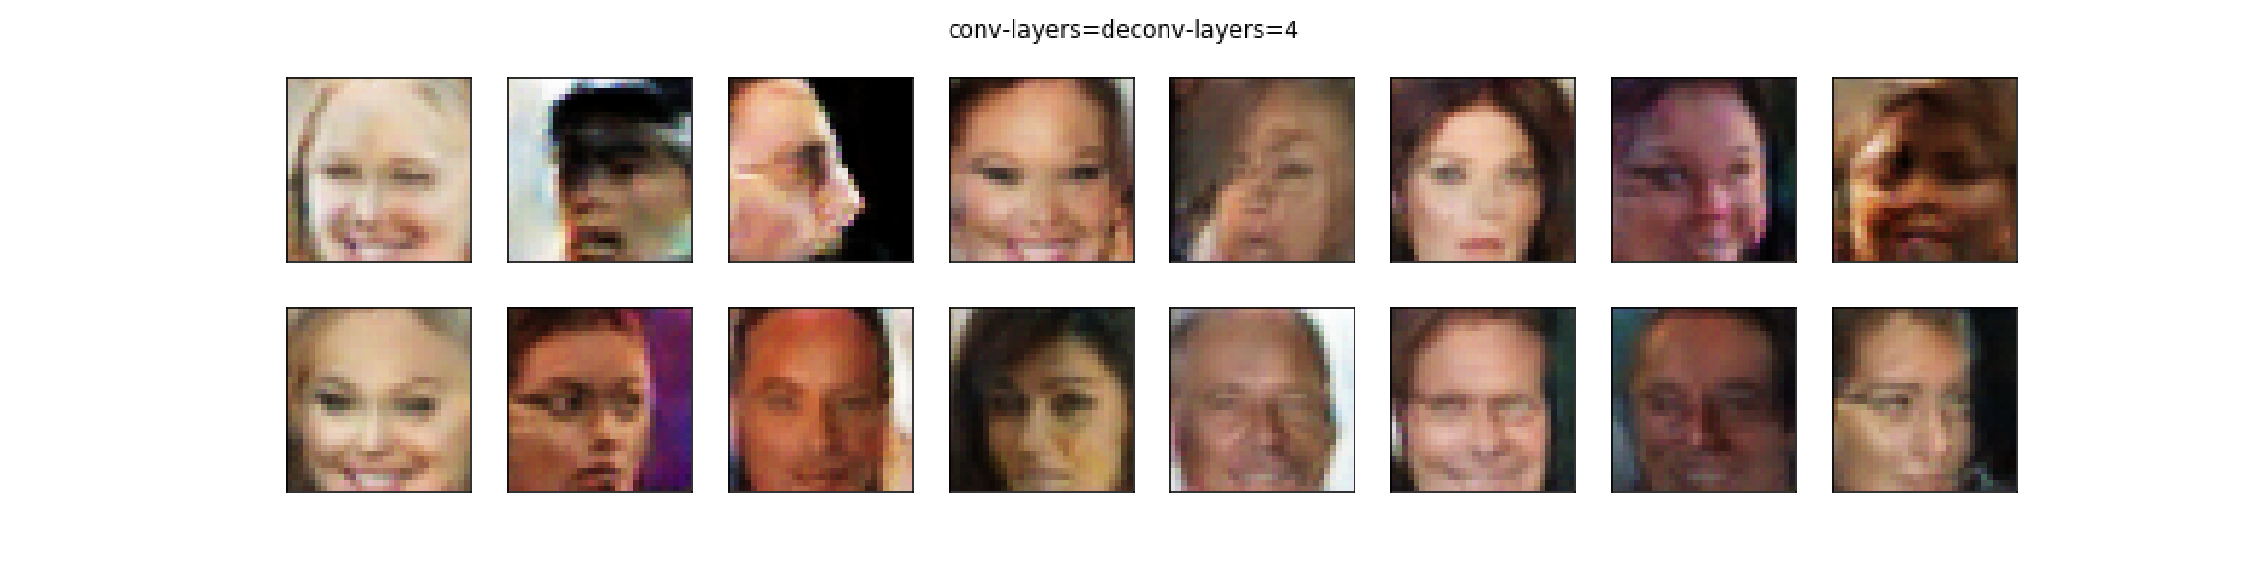

In [73]:
# conv-layers=deconv-layers=3 ... 4
parameter_list_name = ['conv-layers=deconv-layers=3','conv-layers=deconv-layers=4']
train_num_list = [4, 8]
param_list = ['num_epochs', 'conv_deconv']
epoch_list = [100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

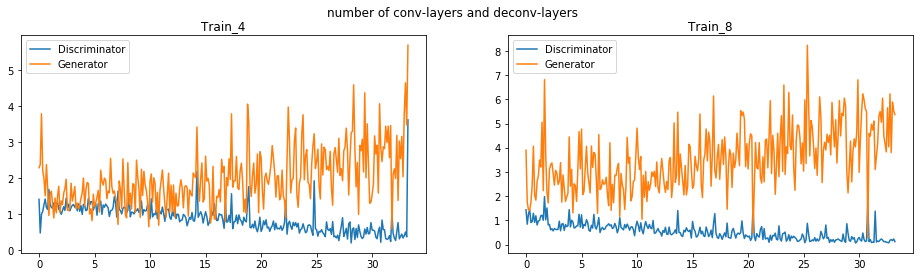

In [70]:
view_plots([[4, 'num_epochs', 9],
            [8, 'conv_deconv', 9]],'number of conv-layers and deconv-layers', 'conv_deconv')  

### Result for parameter number of conv-layers and deconv-layers:
There is no clear trend with regard to the number of conv-layers and deconv-layers. Corresponding images for conv-layers=3 and deconv-layers=3 look similar to conv-layers=4 and deconv-layers=4. However, the trend of losses is slightly better for conv-layers=4 and deconv-layers=4, higher (positive) loss for the Generator and slightly lower loss for the Discriminator. In the following conv-layers=4 and deconv-layers=4 will be used for further parameter studies.

<a id='Parameter_lr'></a>

## Parameter: lr @ beta1=0.1	
## To Do: Train 37

Parameters          | 27th Train-Run| 28th Train-Run| 29th Train-Run | 
----------          | ------------- | ------------- | -------------  |
batch_size          |   32          |   32          |  32            |
img_size            |   32          |   32          |  32            |
deconv-layers       |   4           |   4           |  4             |
conv-layers         |   4           |   4           |  4             |
d_conv_dim          |   64          |   64          |  64            |
g_conv_dim          |   64          |   64          |  64            | 
z_size              |   100         |   100         |  100           | 
lr                  |   0.001       |   0.0005      |  0.0002        |   
beta1               |   0.1         |   0.1         |  0.1           |
beta2               |   0.999       |   0.999       |  0.999         |
dropout             |   yes         |   yes         |  yes           |
n_epochs            |   100         |   100         |  100           |

## Parameter: lr @ beta1=0.2	

Parameters          | 37th Train-Run| 39th Train-Run| 26th Train-Run | 
----------          | ------------- | ------------- | -------------  |
batch_size          |   32          |   32          |  32            |
img_size            |   32          |   32          |  32            |
deconv-layers       |   4           |   4           |  4             |
conv-layers         |   4           |   4           |  4             |
d_conv_dim          |   64          |   64          |  64            |
g_conv_dim          |   64          |   64          |  64            | 
z_size              |   100         |   100         |  100           | 
lr                  |   0.001       |   0.0005      |  0.0002        |   
beta1               |   0.2         |   0.2         |  0.2           |
beta2               |   0.999       |   0.999       |  0.999         |
dropout             |   yes         |   yes         |  yes           |
n_epochs            |   100         |   100         |  100           |

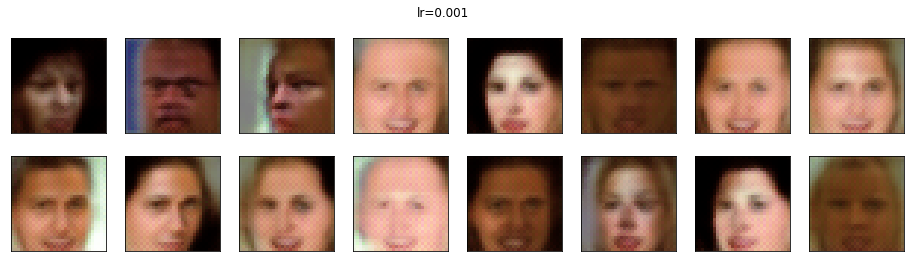

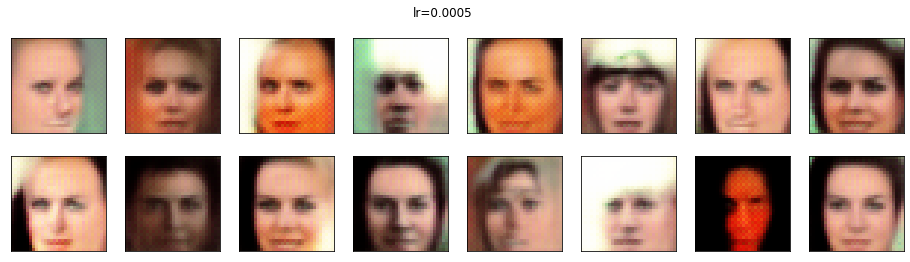

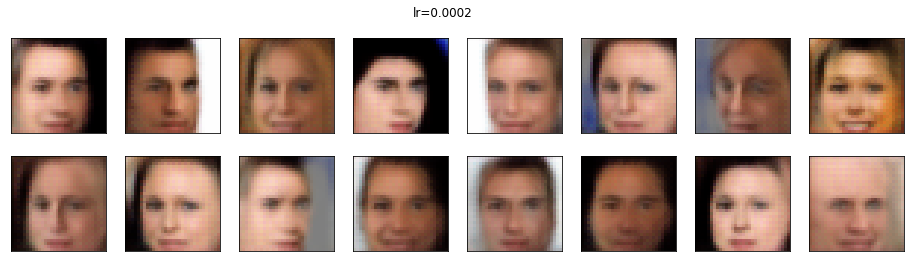

In [46]:
# lr=0.001, 0.0005, 0.0002 @ beta1=0.1
parameter_list_name = ['lr=0.001 @ beta=0.1','lr=0.0005 @ beta=0.1', 'lr=0.0002 @ beta=0.1']
train_num_list = [27, 28, 29]
param_list = ['lr', 'lr', 'lr']
epoch_list = [100, 100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)
    
# lr=0.001, 0.0005, 0.0002 @ beta1=0.2
parameter_list_name = ['lr=0.001 @ beta=0.2','lr=0.0005 @ beta=0.2', 'lr=0.0002 @ beta=0.2']
train_num_list = [37, 39, 26]
param_list = ['lr', 'lr', 'lr']
epoch_list = [100, 100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

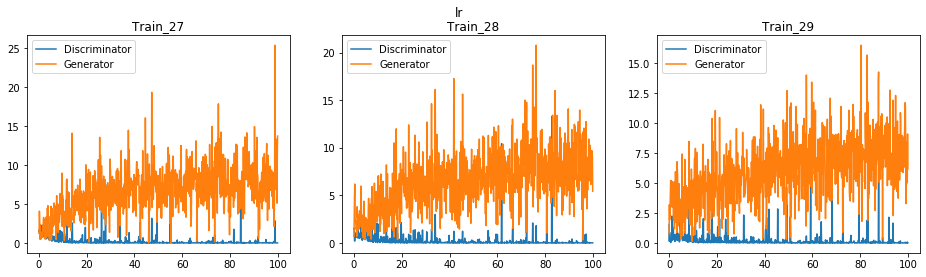

In [69]:
view_plots([[27, 'lr', 9],
            [28, 'lr', 9],
            [29, 'lr', 9]],'lr @ beta1=0.1', 'lr')   

In [ ]:
view_plots([[37, 'lr', 9],
            [39, 'lr', 9],
            [26, 'lr', 9]],'lr @ beta1=0.2', 'beta1')  

### Result for parameter lr:
Learning rates in the range between 0.01 and 0.0001 were tested. In all cases the GAN is able to learn and generated fake images of faces are successfully constructed. However, a learning rate of lr=0.0002 lead to a best results. As the choice of batch_size has to be done with an appropriate learning rate, learning rates were also studied in combination with different values for <a href='#Parameter_batch_size'>batch_size</a> as well as for <a href='#Parameter_beta1'>beta1</a>.

<a id='Parameter_batch_size'></a>

## Parameter: batch_size @ lr=0.0002

Parameters          | 24th Train-Run| 26th Train-Run| 36th Train-Run|
----------          | ------------- | ------------- | ------------- | 
batch_size          |   16          |   32          |   64          | 
img_size            |   32          |   32          |   32          | 
deconv-layers       |   4           |   4           |   4           | 
conv-layers         |   4           |   4           |   4           |  
d_conv_dim          |   64          |   64          |   64          |
g_conv_dim          |   64          |   64          |   64          |  
z_size              |   100         |   100         |   100         | 
lr                  |   0.0002      |   0.0002      |   0.0002      |  
beta1               |   0.2         |   0.2         |   0.2         | 
beta2               |   0.999       |   0.999       |   0.999       | 
dropout             |   yes         |   yes         |   yes         | 
n_epochs            |   100         |   100         |   100         |  

## Parameter: batch_size @ lr=0.0005

Parameters          | 38th Train-Run| 39th Train-Run| 40th Train-Run|
----------          | ------------- | ------------- | ------------- | 
batch_size          |   16          |   32          |   64          | 
img_size            |   32          |   32          |   32          | 
deconv-layers       |   4           |   4           |   4           | 
conv-layers         |   4           |   4           |   4           |  
d_conv_dim          |   64          |   64          |   64          |
g_conv_dim          |   64          |   64          |   64          |  
z_size              |   100         |   100         |   100         | 
lr                  |   0.0005      |   0.0005      |   0.0005      |  
beta1               |   0.2         |   0.2         |   0.2         | 
beta2               |   0.999       |   0.999       |   0.999       | 
dropout             |   yes         |   yes         |   yes         | 
n_epochs            |   100         |   100         |   100         |   

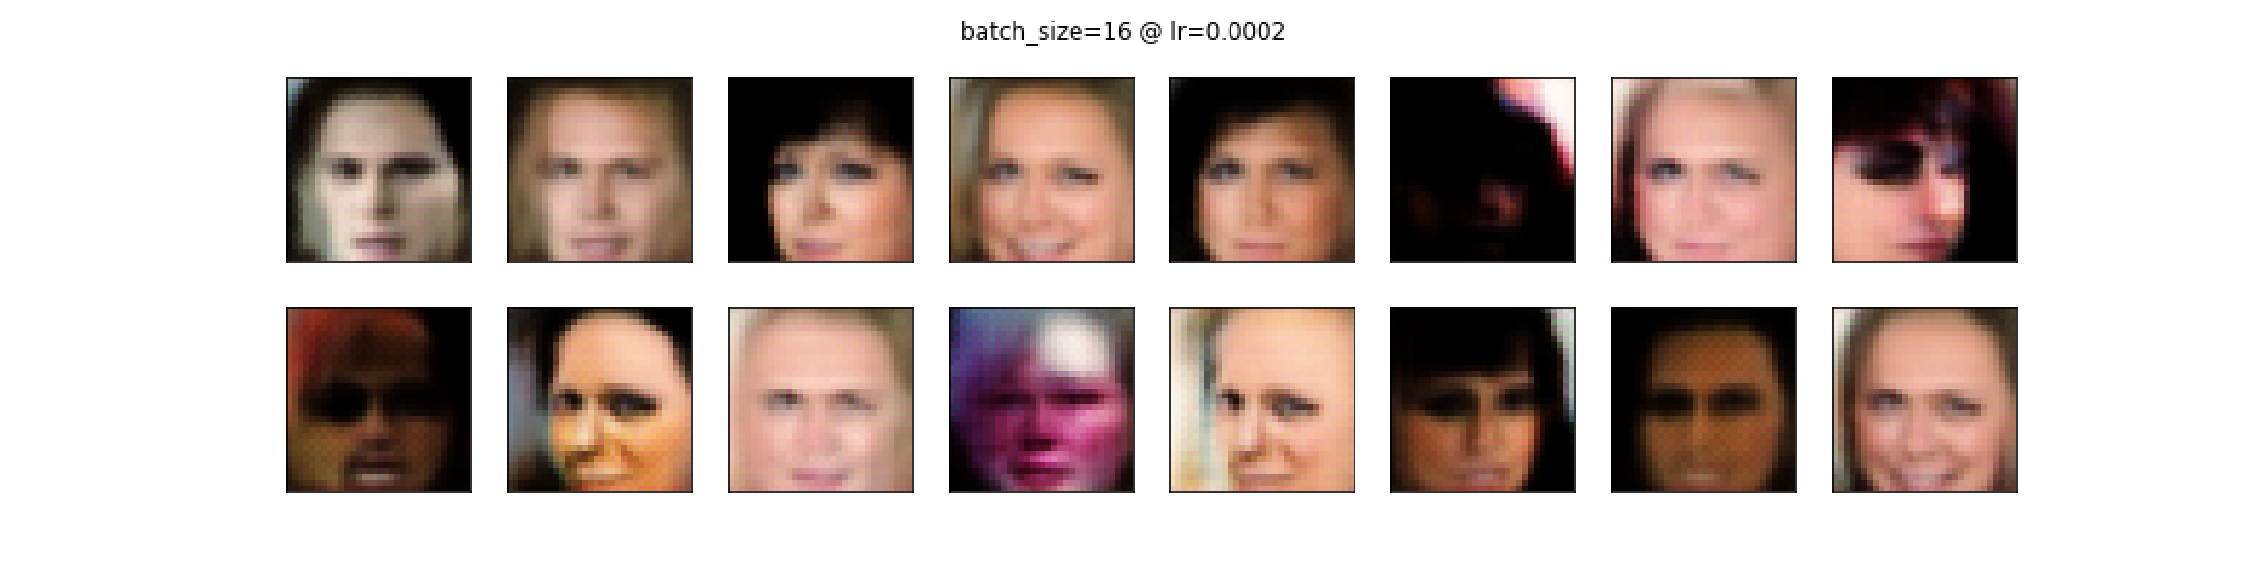

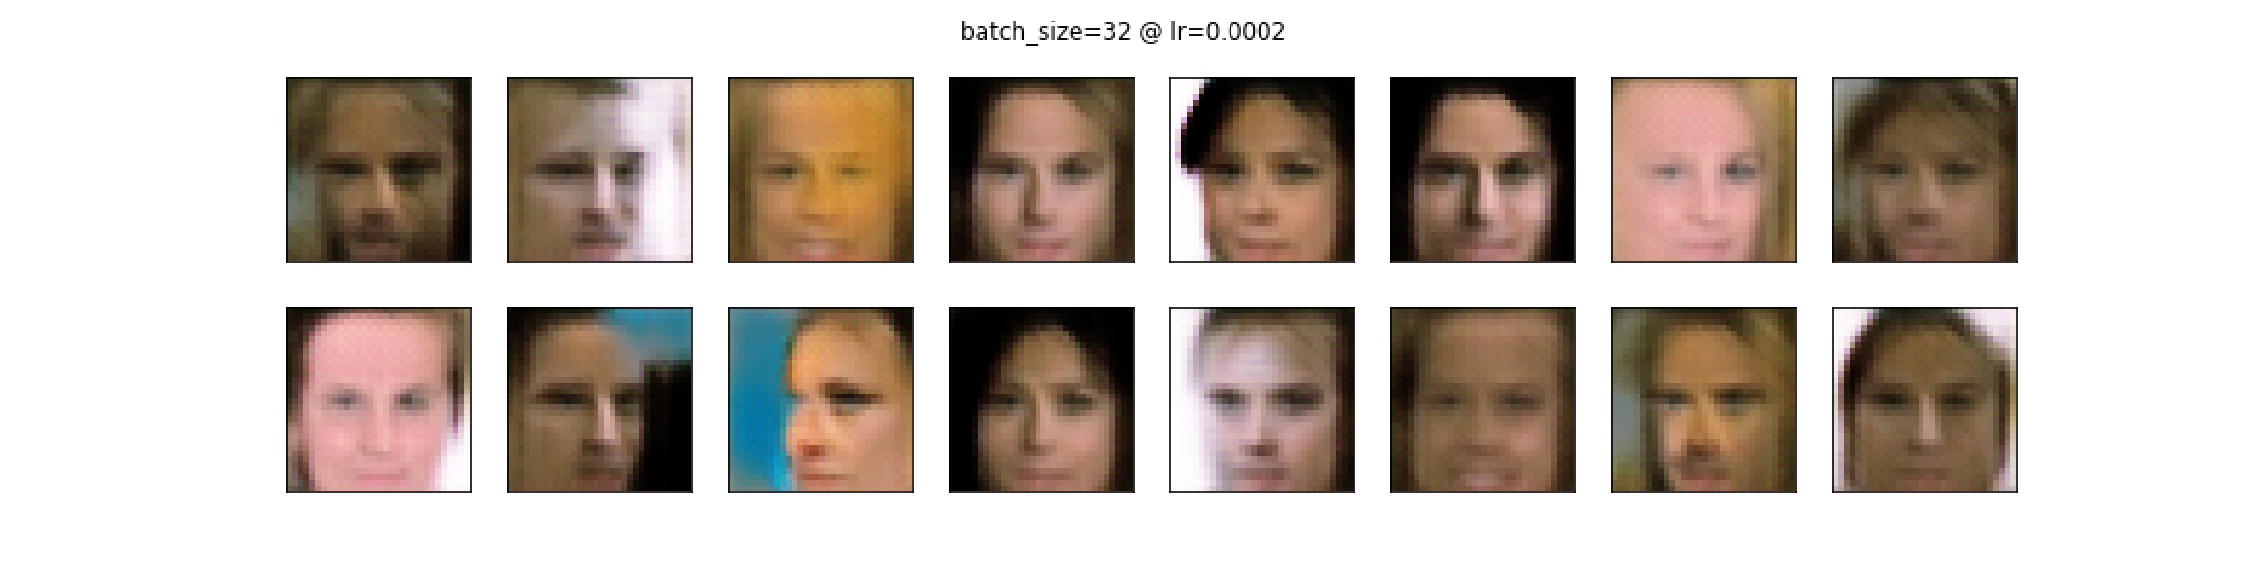

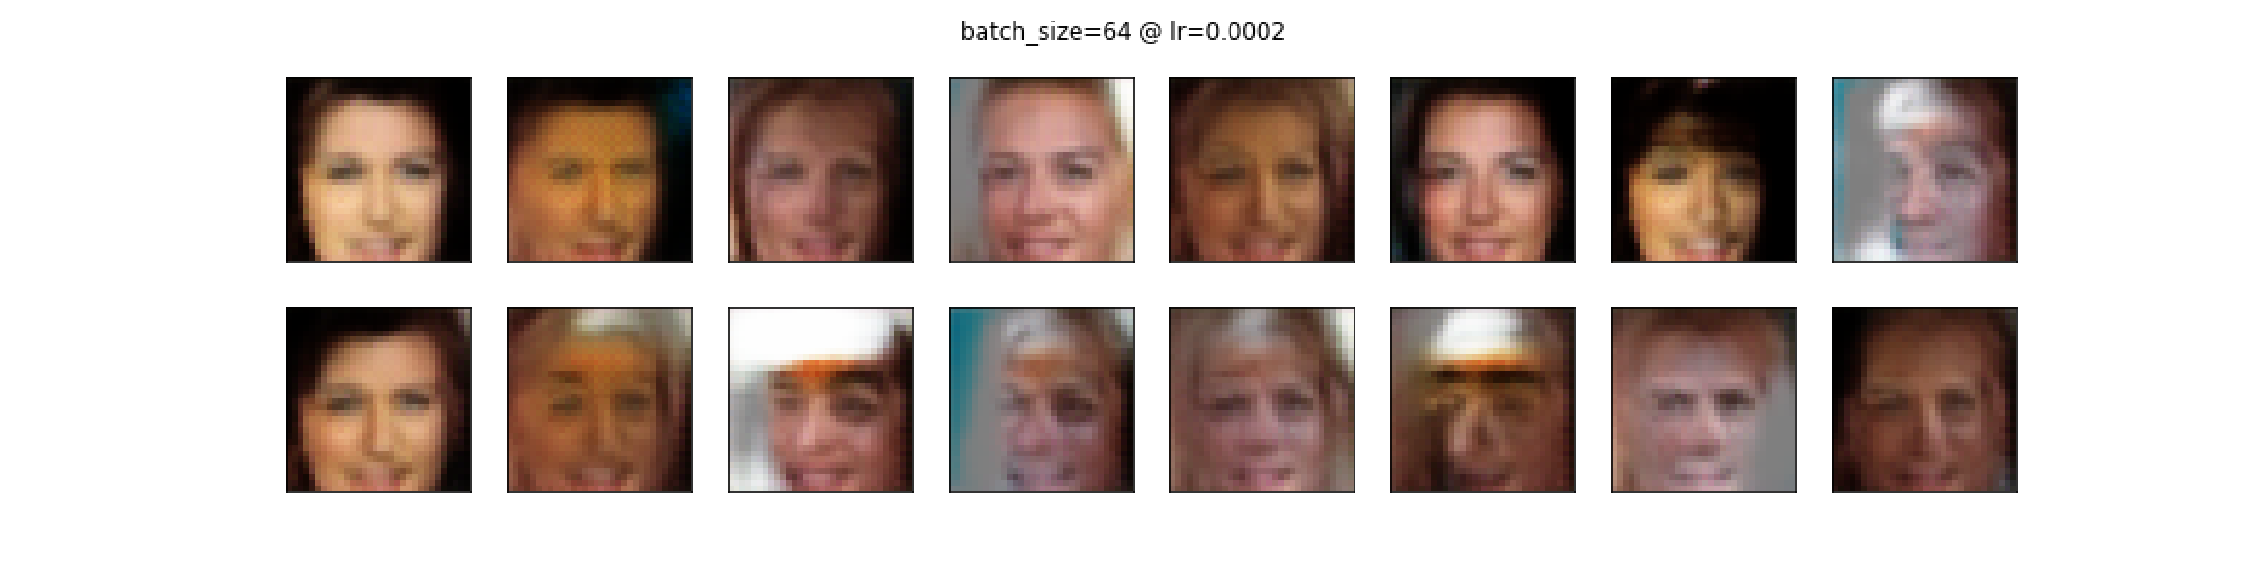

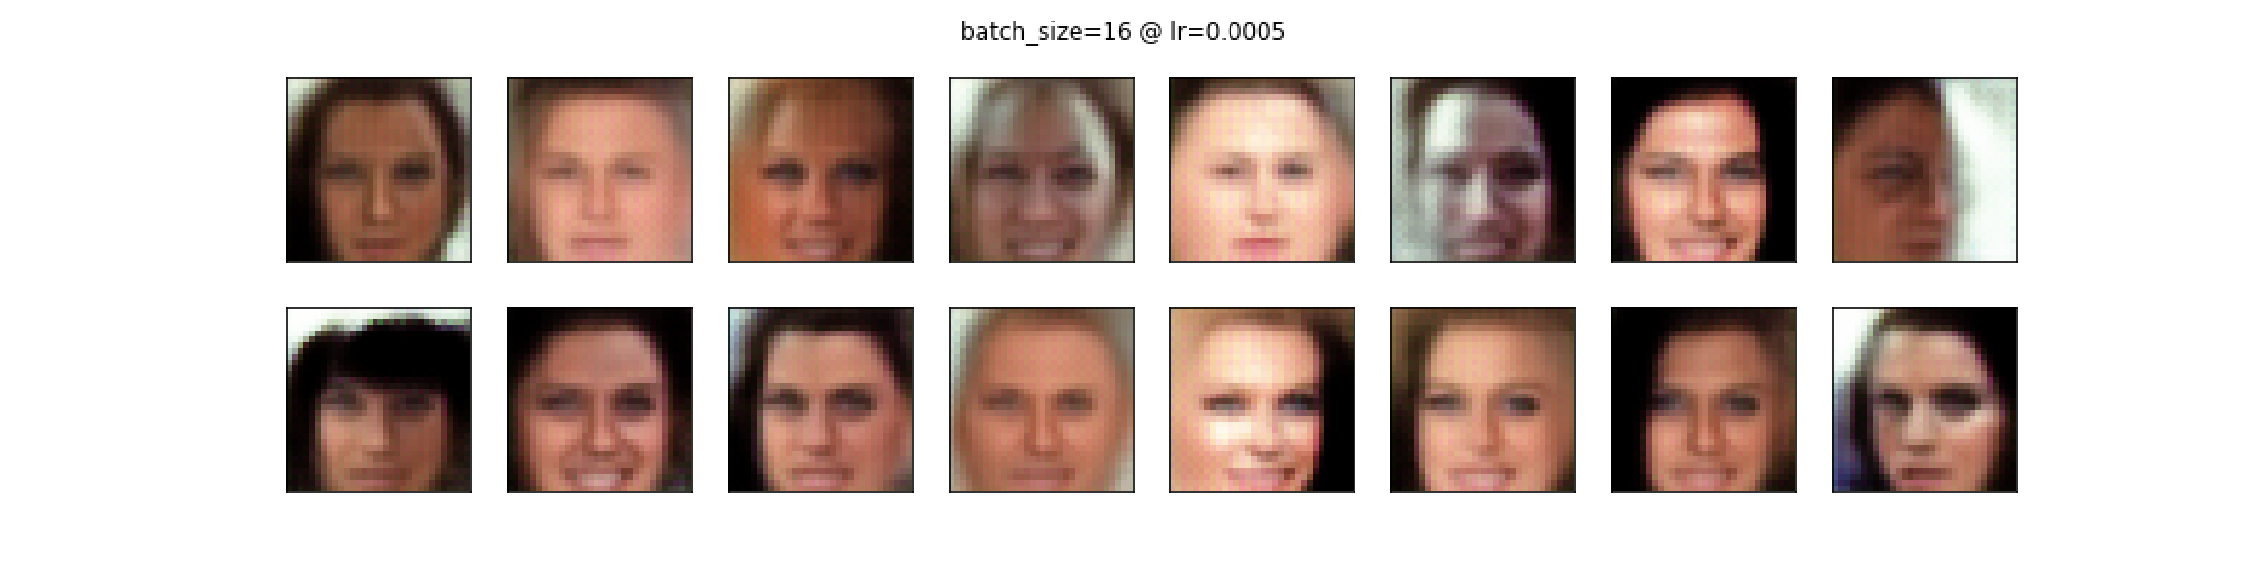

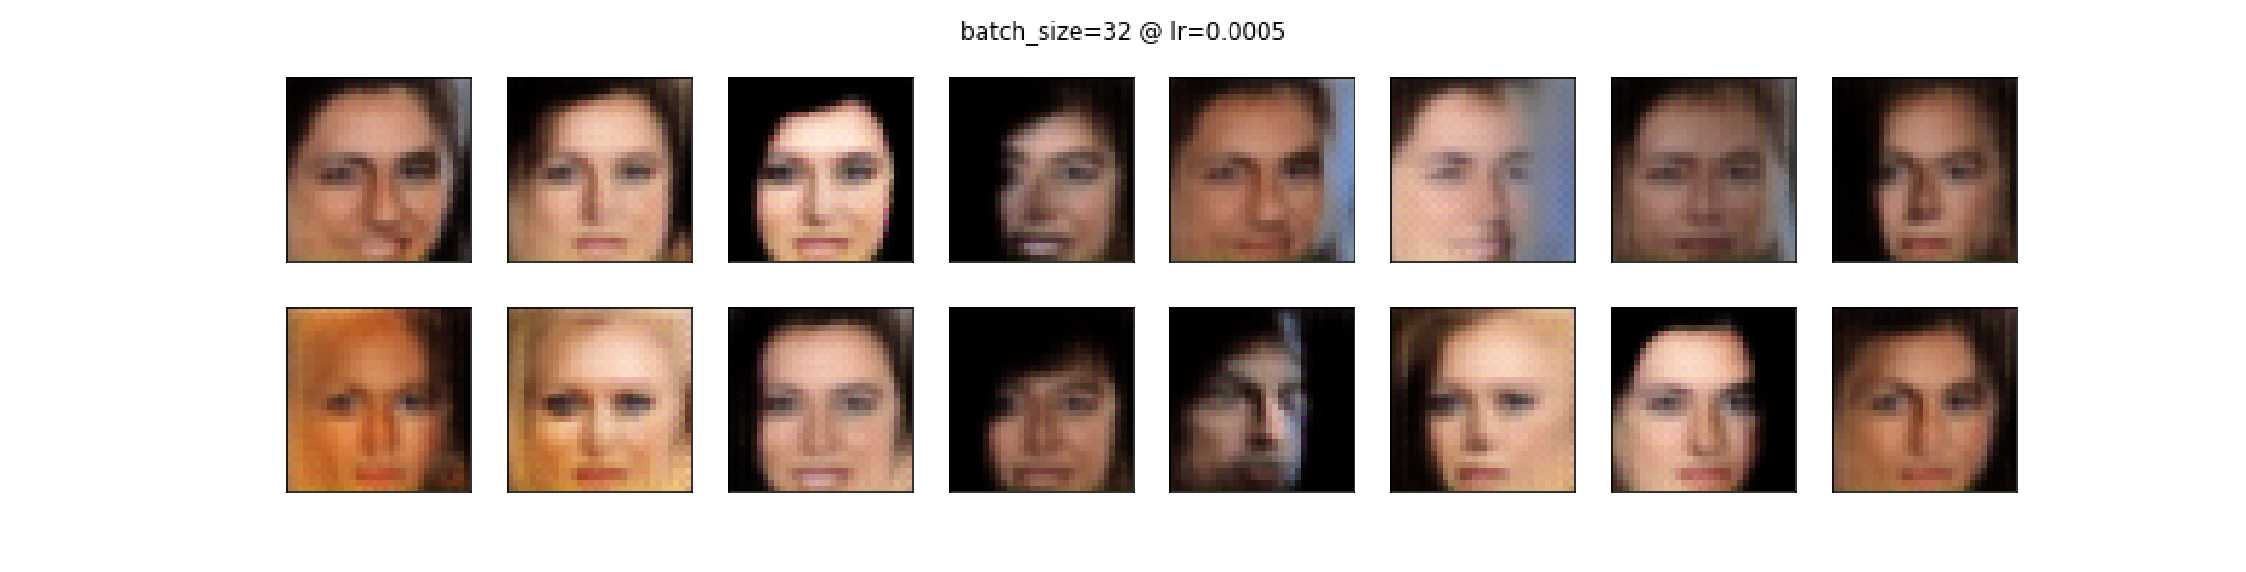

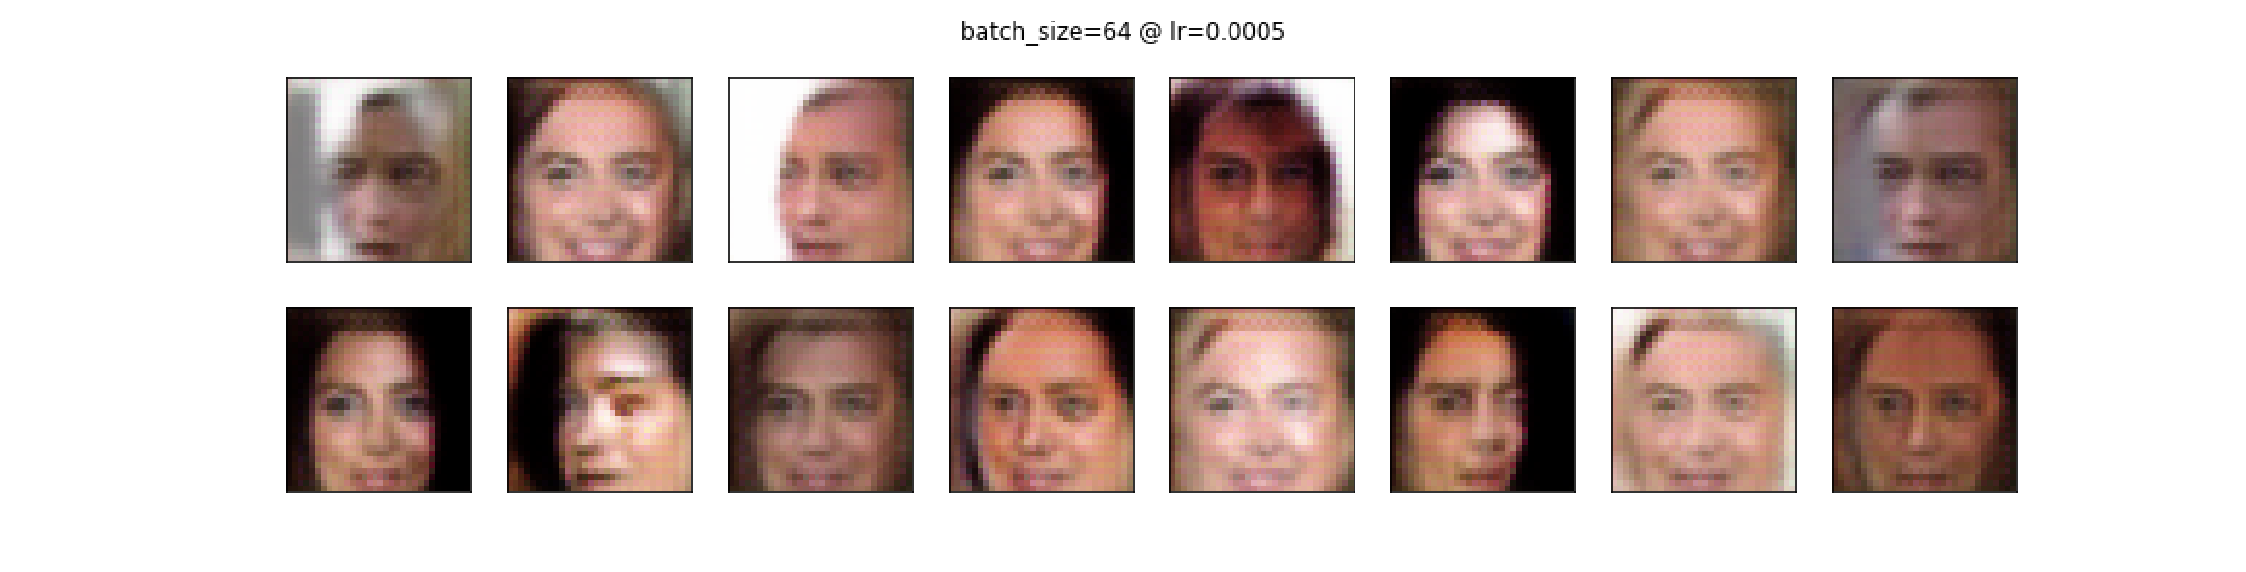

In [101]:
# batch_size=16, 32, 64 @ lr=0.0002
parameter_list_name = ['batch_size=16 @ lr=0.0002','batch_size=32 @ lr=0.0002', 'batch_size=64 @ lr=0.0002']
train_num_list = [24, 26, 36]
param_list = ['lr', 'lr', 'batch_size']
epoch_list = [100, 100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)
    

# batch_size=16, 32, 64 @ lr=0.0005
parameter_list_name = ['batch_size=16 @ lr=0.0005','batch_size=32 @ lr=0.0005', 'batch_size=64 @ lr=0.0005']
train_num_list = [38, 39, 40]
param_list = ['batch_size', 'batch_size', 'batch_size']
epoch_list = [100, 100, 90]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

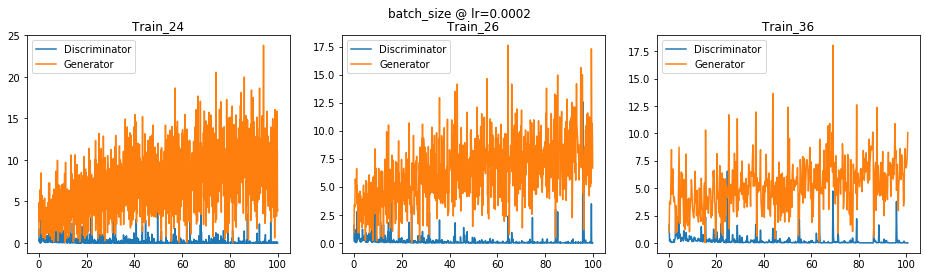

In [115]:
view_plots([[24, 'lr', 18],
            [26, 'lr', 9],
            [36, 'batch_size', 5]],'batch_size @ lr=0.0002', 'batch_size')

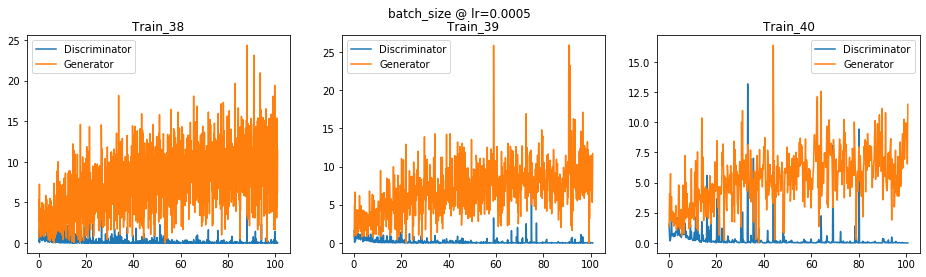

In [116]:
view_plots([[38, 'batch_size', 18],
            [39, 'batch_size', 9],
            [40, 'batch_size', 5]],'batch_size @ lr=0.0005', 'batch_size')

### Result for batch_size:
The value range for the batch_size was chosen between 16 and 512. A larger batch_size has a positive effect on the computational boost. However, if the batch_size is getting too high the feature resolution is getting worse (more blurred). If the batch size is too small then the gradients will become more unstable and would need to reduce the learning rate. So batch size and learning rate are linked. The noisy loss for small batch sizes can be used to overcome local minima during training. If one use a bigger batch size, then the gradients will become less noisy (this can be clearly seen in the results above) but it will take longer to converge. Therefore a batch_size of 32 has been chosen. Up to a batch_size of 512 no out-of-memory errors were observed (getting critical for higher batch_sizes).

<a id='Parameter_beta1'></a>

## Parameter: beta1

Parameters          | 29th Train-Run| 26th Train-Run| 31th Train-Run | 
----------          | ------------- | ------------- | -------------  |
batch_size          |   32          |   32          |  32            |
img_size            |   32          |   32          |  32            |
deconv-layers       |   4           |   4           |  4             |
conv-layers         |   4           |   4           |  4             |
d_conv_dim          |   64          |   64          |  64            |
g_conv_dim          |   64          |   64          |  64            | 
z_size              |   100         |   100         |  100           | 
lr                  |   0.0002      |   0.0002      |  0.0002        |   
beta1               |   0.1         |   0.2         |  0.3           |
beta2               |   0.999       |   0.999       |  0.999         |
dropout             |   yes         |   yes         |  yes           |
n_epochs            |   100         |   100         |  100           |

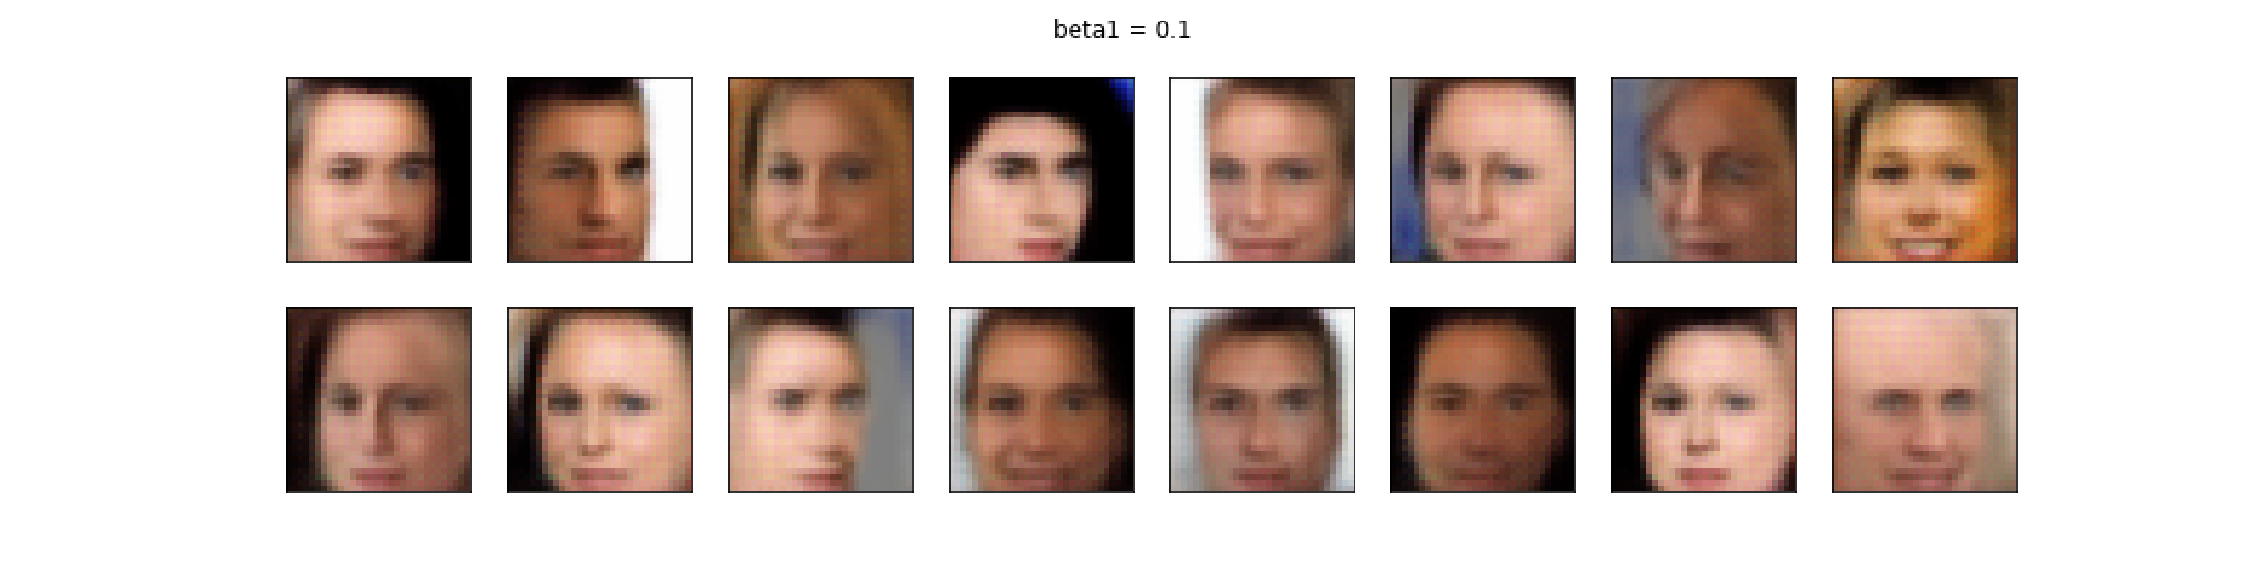

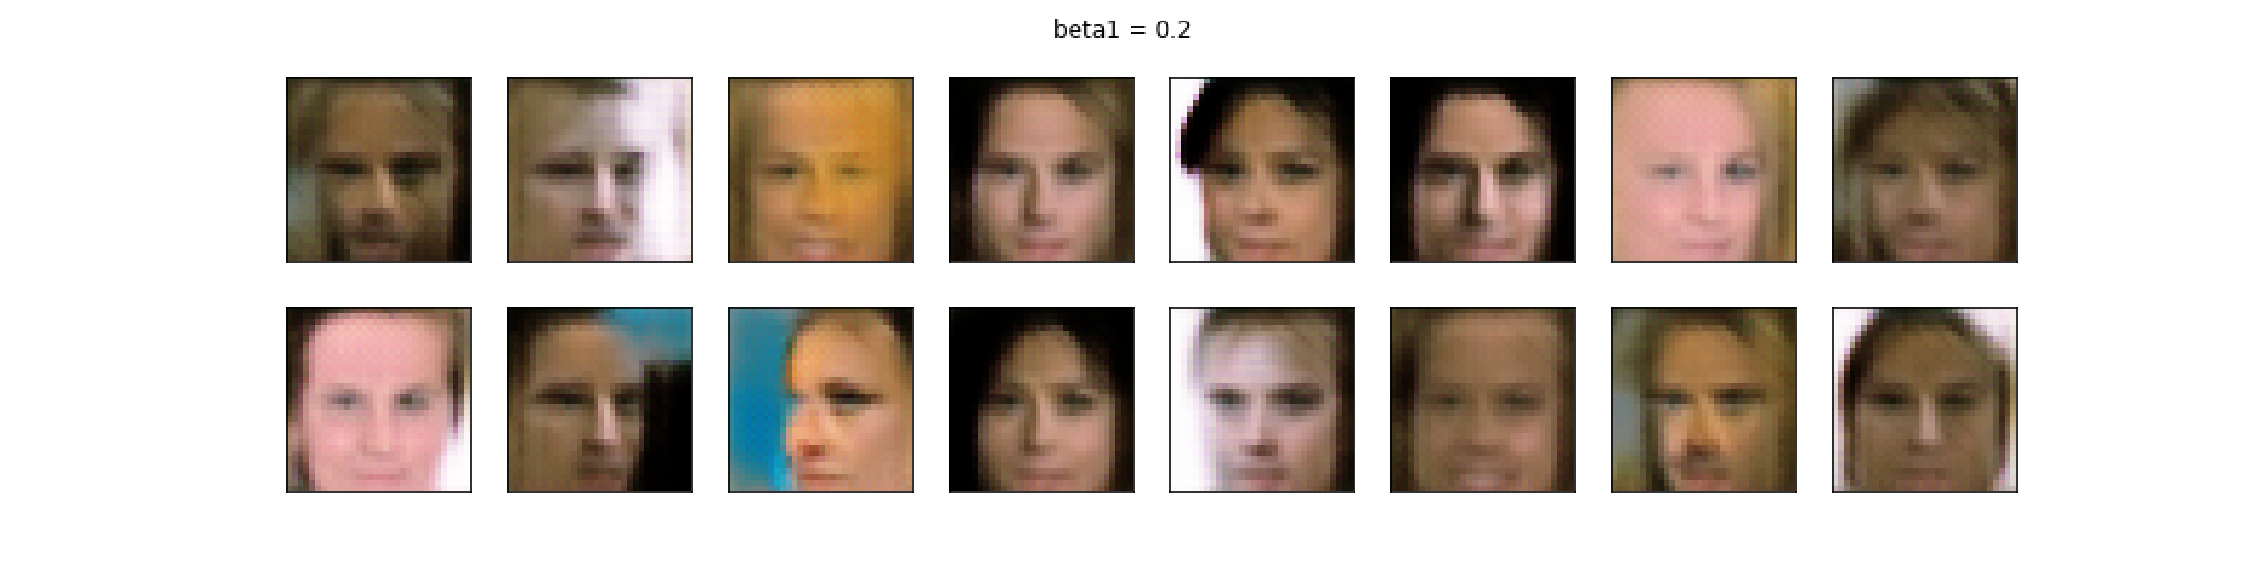

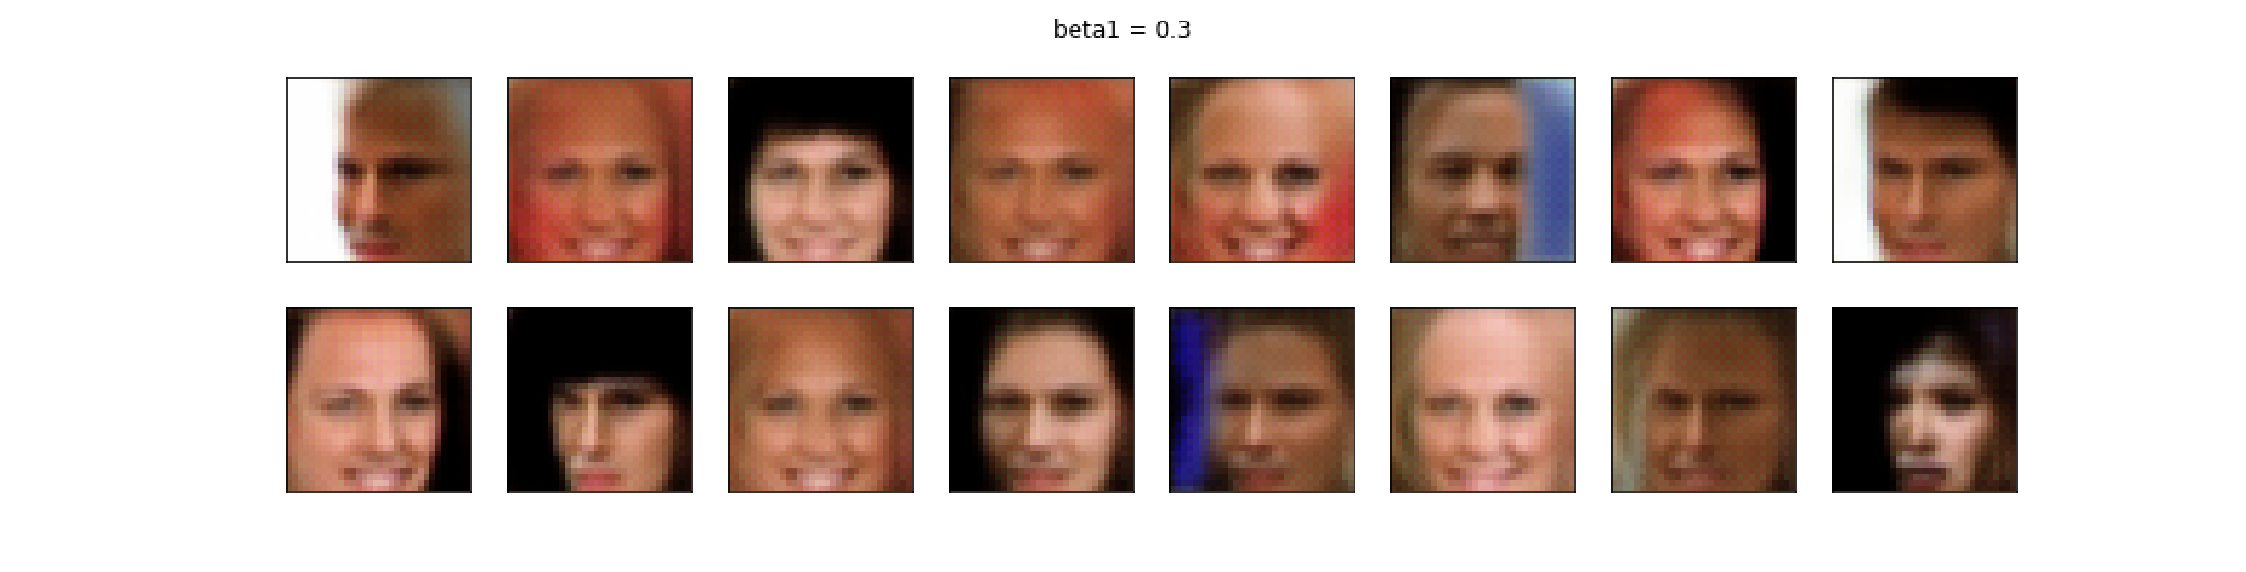

In [78]:
# beta1=0.1, 0.2, 0.3
parameter_list_name = ['beta1 = 0.1', 'beta1 = 0.2','beta1 = 0.3']
train_num_list = [29, 26, 31]
param_list = ['lr', 'lr', 'lr']
epoch_list = [100, 100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

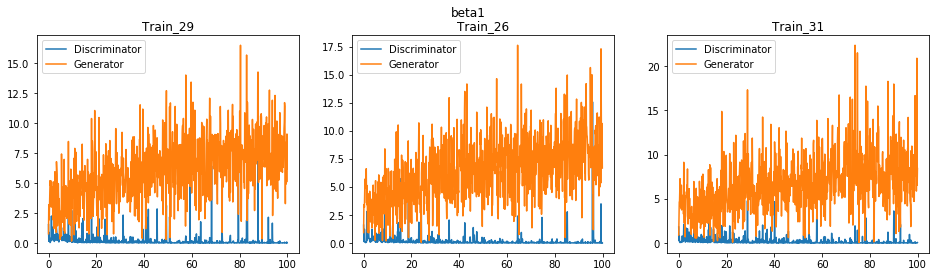

In [26]:
view_plots([[29, 'lr', 9],
            [26, 'lr', 9],
            [31, 'lr', 9]],'beta1', 'beta1')    

### Result for beta1:
Values for beta1 were investigated in the range between 0.1 to 0.5. It was found out that beta1 values in the range between 0.1 to 0.3 have shown to get best results for generated images.

<a id='Parameter_dropout'></a>

## Parameter: Dropout config
## To Do: Results for Train41
In separate Training runs different settings of Dropout layers were tested. 
In Train41 no dropout layers were impmented whereas in Train32...35 different dropout probabilities of 0.5 and 0.2 and number of dropout layers were studied. 

<img src='assets/Dropout_overview.png' width=90% />

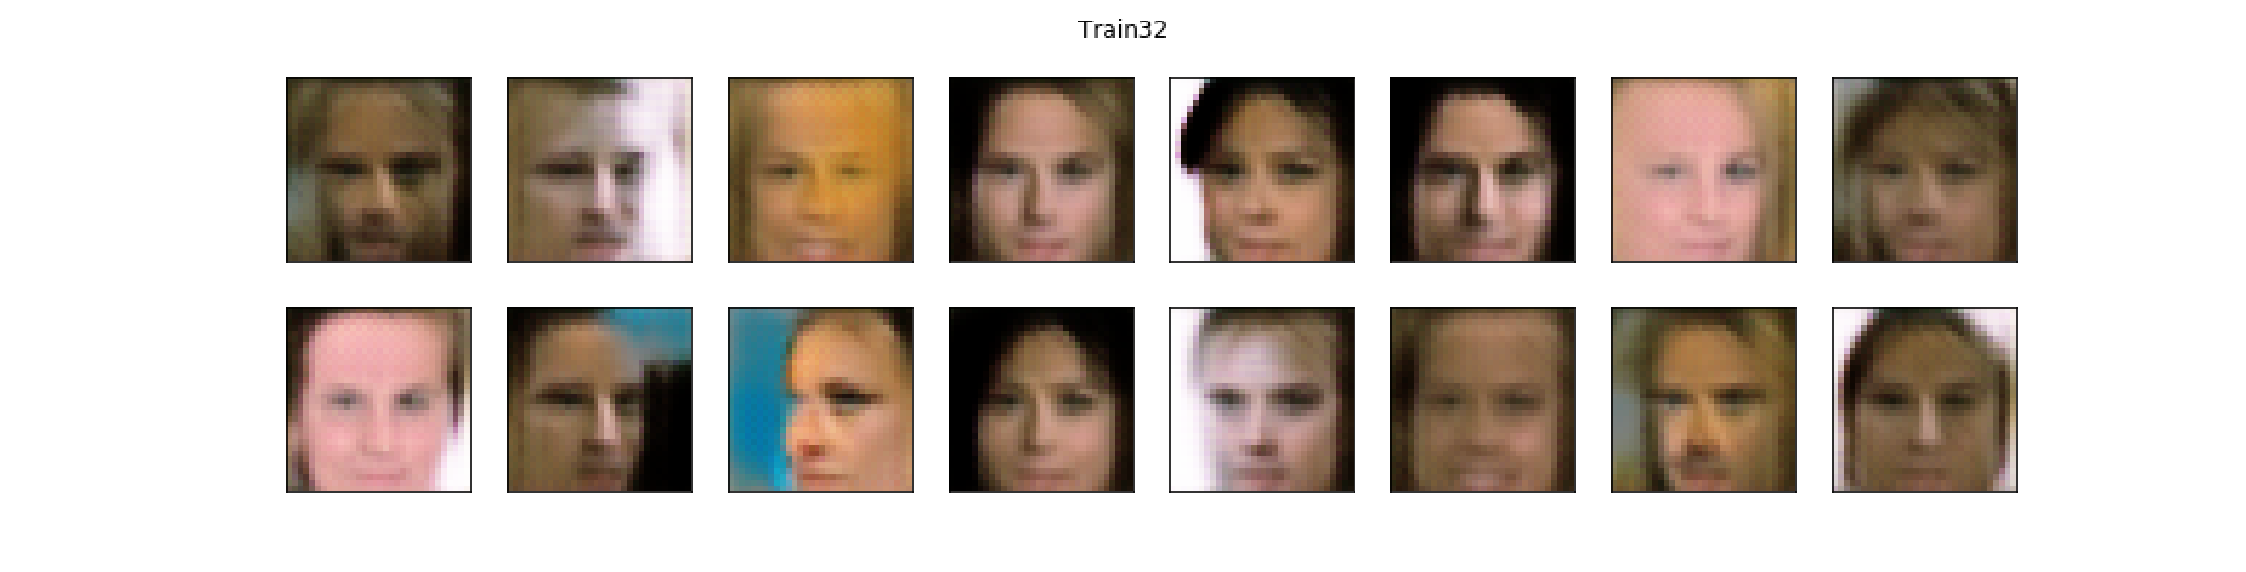

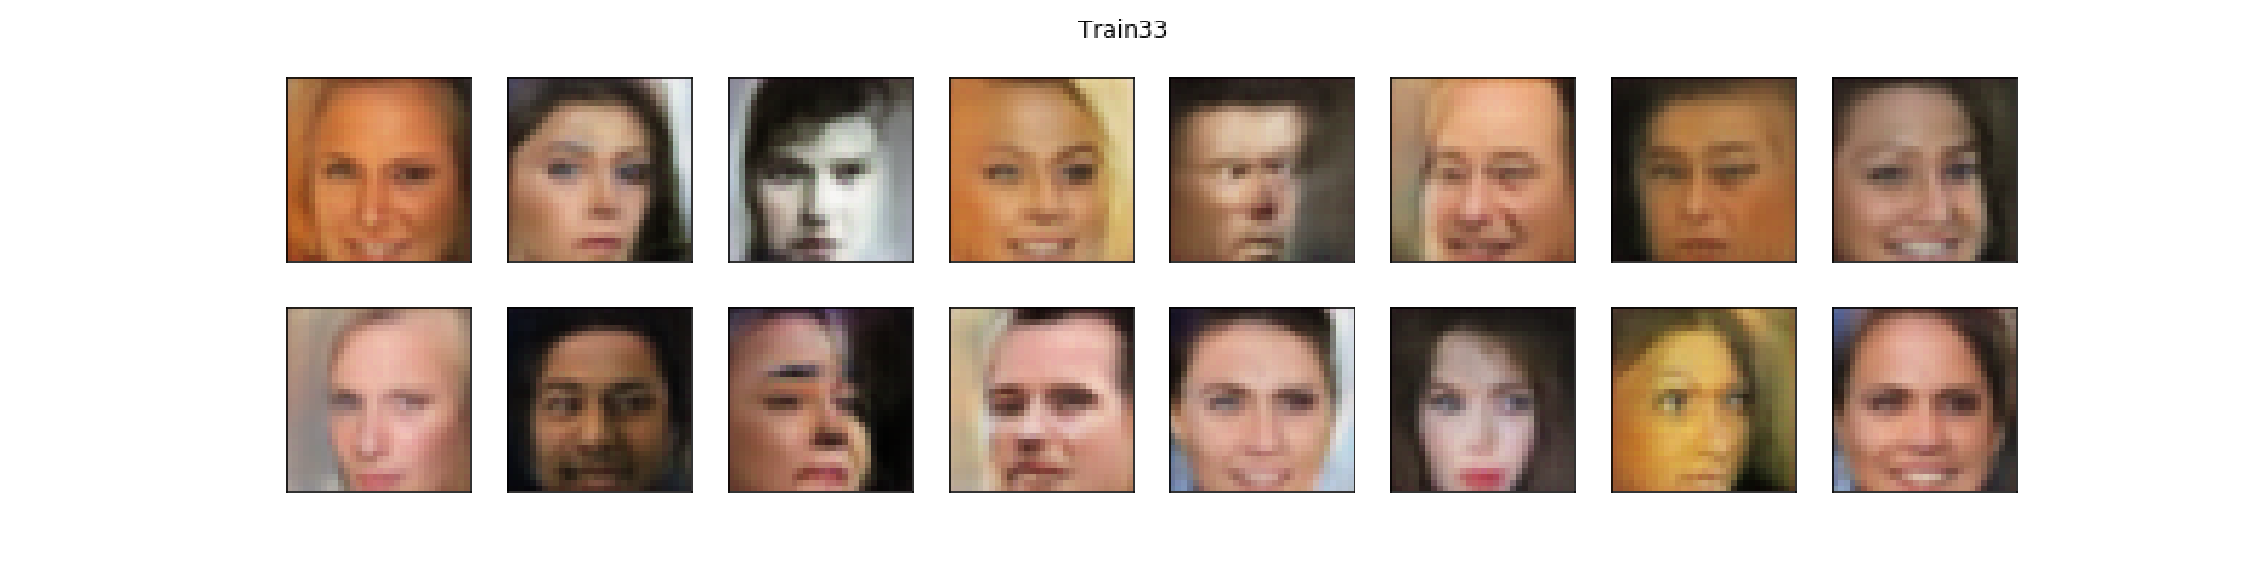

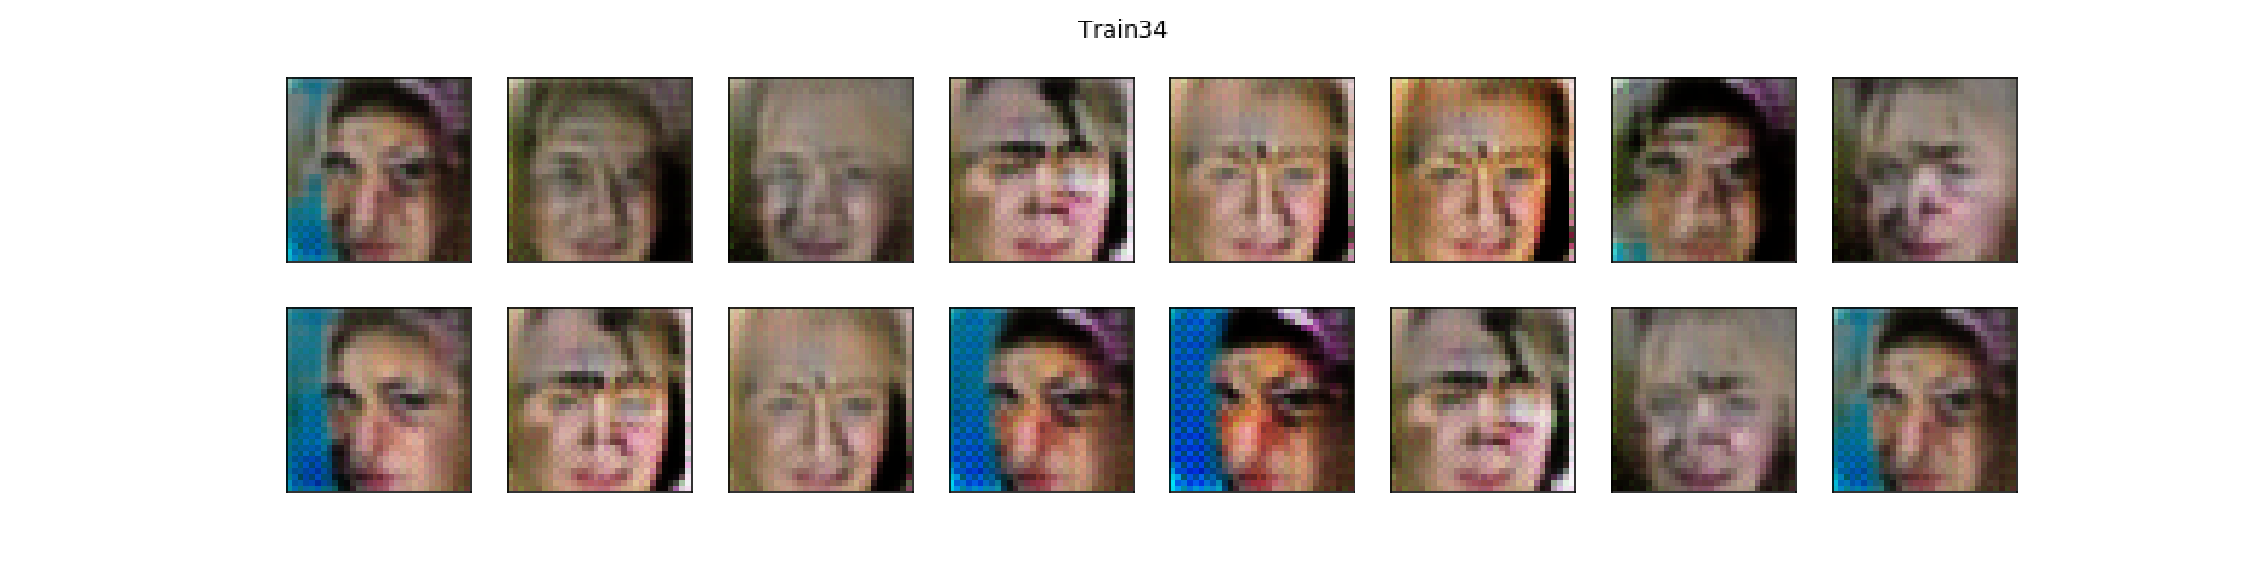

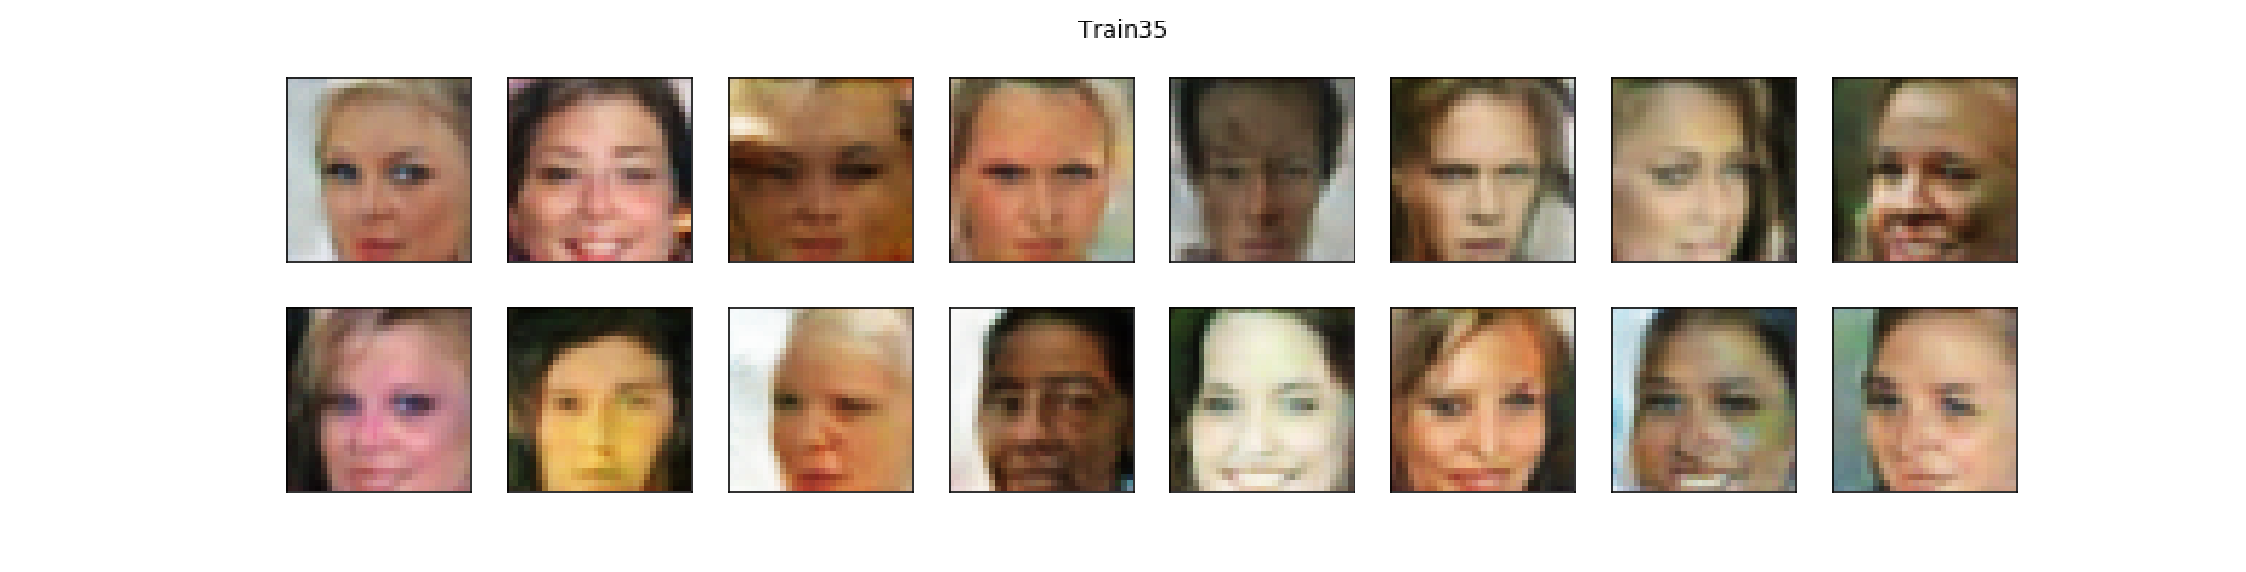

In [91]:
# dropout config
parameter_list_name = ['Train32', 'Train33', 'Train34', 'Train35']
train_num_list = [32, 33, 34, 35]
param_list = ['num_epochs', 'num_epochs', 'drop', 'drop']
epoch_list = [100, 100, 100, 100]
for epoch, param, param_value_name, train_num in zip(epoch_list, param_list, parameter_list_name, train_num_list):
    """
    # plot pkl file
    with open('training_results_pkl/train_' + str(train_num) + '_' + param + '_' + str(epoch) + '_samples.pkl', 'rb') as f:
        samples = pkl.load(f)
    _ = view_samples_2(-1, samples, train_num, param_value_name)
    """
    # plot png file
    plt.figure(figsize=(40,20))
    img = plt.imread('image_sets/train_' + str(train_num) + '_' + str(param_value_name) + '.png')
    plt.axis('off')
    #plt.title(param_value)
    plt.imshow(img)

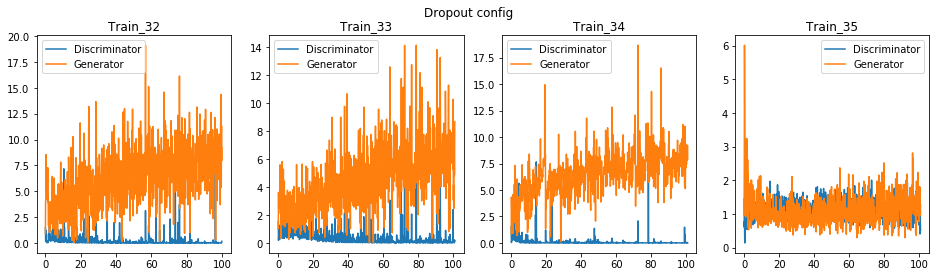

In [90]:
view_plots([[32, 'num_epochs', 9],
            [33, 'num_epochs', 9],
            [34, 'drop', 9],
            [35, 'drop', 9]],'Dropout config', 'drop')    

### Result for Dropout config:
It turns out that applying droping layers leads to a significant enhancement of the quality of generated images. Best results were achieved for Train32 (and Train33), i.e. applying a dropout layer with a dropout probability of 0.5 (0.2) after each convolutional for the discriminator and each deconvolutional layer for the generator.

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result

**Answer:** (Write your answer in this cell)

A whole bunch of parameters setting were tested in sequences (see evaluation above or click on the links below):

## Reasons for the chosen final hyperparameter setting:

### <a href='#Parameter_n_epochs'>Parameter: n_epochs</a>
n_epochs was varied between 1 and 500. Its best value setting extends to the range 50...100. Lower epoch values lead to underfitting, higher epoch values tend to pronounced noisy behavior of the discriminator loss. For both extreme regimes the generated face images are blurred. Therefore n_epochs was set to 100.

### <a href='#Parameter_number_conv_deconv_layers'>Parameter: number of conv-layers and deconv-layers</a>
Two models were constructed: one with 3 and another one with 4 conv and deconv layers for the discriminator and generator, respectively. Corresponding images for conv-layers=deconv-layers=3 look similar to conv-layers=deconv-layers=4. Hence, a clear trend is hard to distinguish in these examples. However, the trend of losses is slightly better for conv-layers=deconv-layers=4 than for conv-layers=deconv-layers=3, i.e. the loss for the Generator is higher and the loss for the Discriminator is slightly lower. Therefore conv-layers=4 and deconv-layers=4 have been used for further parameter studies.

### <a href='#Parameter_batch_size'>Parameter: batch_size</a>
The value range for the batch_size was chosen between 16 and 512. A larger batch_size has a positive effect on the computational boost. However, if the batch_size is getting too high the feature resolution is getting worse (more blurred). If the batch size is too small then the gradients will become more unstable and would need to reduce the learning rate. So batch size and learning rate are linked. The noisy loss for small batch sizes can be used to overcome local minima during training. If one use a bigger batch size, then the gradients will become less noisy (this can be clearly seen in the results above) but it will take longer to converge. Therefore a batch_size of 32 has been chosen. Up to a batch_size of 512 no out-of-memory errors were observed (getting critical for higher batch_sizes).

##### conv_dim:
The conv_dim value was investigated in the range between 32 and 256. With a higher conv_dim for the Generator and the Discriminator the resolution of feature details is getting higher. For example, eyes are better resolved with a conv_dim=256 than with a conv_dim=32. However, even a conv_dim of 64 leads to convincing results.

### <a href='#Parameter_lr'>Parameter: lr</a>
Learning rates in the range between 0.01 and 0.0001 were tested. In all cases the GAN is able to learn and generated fake images of faces are successfully constructed. However, a learning rate of lr=0.0002 lead to a best results. As the choice of batch_size has to be done with an appropriate learning rate, learning rates were also studied in combination with different values for <a href='#Parameter_batch_size'>batch_size</a> as well as for <a href='#Parameter_beta1'>beta1</a>.

### <a href='#Parameter_beta1'>Parameter: beta1</a>
Values for beta1 were investigated in the range between 0.1 to 0.5. It was found out that beta1 values in the range between 0.1 to 0.3 have shown to get best results for generated images.

### <a href='#Parameter_dropout'>Parameter: Dropout config</a>
It turns out that applying droping layers leads to a significant enhancement of the quality of generated images. Best results were achieved for Train32 (and Train33), i.e. applying a dropout layer with a dropout probability of 0.5 (0.2) after each convolutional for the discriminator and each deconvolutional layer for the generator.

### Further improvements:
- To overcome the issue of a biased dataset (celebrity faces that are mostly white): one could add more images of non-white celebrity faces to get a more balanced dataset in the end.
    
- The model size is limited by the number of conv-layers and deconv-layers which was set to 4 in maximum. Higher values were not tested so far. Increasing the model size could especially enhance the feature extraction of the Discriminator. The adversarial Generator is then forced to produce images with better feature resolution.

- A further increase of the conv_dim could lead to better results. However, this would significantly increase the training time.

- The dataset images are 64x64x3 NumPy images. In the get_dataloader function I resized the images down to 32x32x3. This is the image size for the Discriminator input and the size of the Generator output. This resolution of the generated images is noisy. If one would keep width=64 and height=64 the images could resemble more the original ones. However, this would also increase the training duration.

- Regarding the optimizer strategy: For the Discriminator as well as for the Generator the same type of optimizer (Adam) was chosen with a learning rate down to 0.0001. A combination of different optimizer like SGD for the Discriminator and Adam for the Generator as proposed by [Soumith](https://github.com/soumith/ganhacks) has not been tested yet.